<a href="https://colab.research.google.com/github/FelixEbenezer/Facebook_Analyse-et-extraction-de-donnees/blob/main/Facebook_extract_analyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXTRACTION DE DONNEES DE FACEBOOK

-  Criation de APP sur Facebook et obtention de code/tokens access
- Données basiques d´une page (Folowers, engagement, ...)
- Page fans
- Likes et dislikes


## 1. CRIATION DE APP SUR FACEBOOK

In [ ]:
- Acceder à link: https://developers.facebook.com/
- s´enregistrer, et apres créer un app, choisir la premiere option Enterprise..API graph..
- Ds parametres, general, on Application ID et clé secrete que nous allons utiliser pour acceder a notre app
- Pour ce travail (Analyse et extraction de données et non de construction avancée de pages de facebook), je me base sur des fonctionnalités basiques 
car il existe des fonctionnalités plus avancées telles que pages_read_engagement entre autres
et que pour lesquelles on doit demander les autorisitions a facebook et que de fois ça prend des jours avant validation de celles ci.
- apres on cherche sur google Graph api explorer pour choisir celle qui va avec Developers for Facebook, et on a une page qui affiche déja notre app et on 
peut generer access token
- on clique donc sur generate acess token et on choisit le role associé à ce profil. Vaut mieux selectionner toutes les permissions et autorisations pour
éviter les futures desagréments;
- cliquer sur l access token pour plus de detaisl et choiri ouvrir dans l outil access token
ou on peut voir plus d infos y compris le delai d expiration de access token qui est de 1 h, qu on peut bien changer en cliquant en bas sur Etendre le temps 
de access token et qui passe d´1h a 2 mois.

2. EXPLOITATION DE GRAPH API

In [ ]:
- sur la page Graph api explorer de Facebook developer (https://developers.facebook.com/tools/explorer/) ou nous avons généré le access token, on peut faire
quelques requisitions pour mieux comprendre le fonctionnement de graph api telles que:
GET me: retourne les données sur ta page facebook a savoir ton nom et ton ID facebook
on peut incluse clicer sur rechercher un camp pour ajuter la liste des camps a consulter sur ton perfil tels que birthday, email, ...
Comme le focus de ce travail est de travailler avec les pages facebook, essaie de mettre le nom de ta page a la place de me et voir le resultat que ça va donner
Pour mon cas la page est: YaliAngoChapter
- Alias si tu essaies d acceder autres pages facebook qui ne sont pas associées a ton compte, l accés te sera refusé
Et on peut meme lui associer certains camps tels que posts(pour voir les posts publiés sur cette page), birthday, ...

3. OBTENTION D UN TOKEN TEMPORAIRE

In [ ]:
#IMPORTACAO DE BIBLIOTHEQUES

In [ ]:
!pip install facebook-sdk

In [ ]:
import facebook
import requests
import pandas as pd
import numpy as np

In [ ]:
!pip install plotly --upgrade #Actualiser la version de plotly pour mieux visualiser les choses 

     |████████████████████████████████| 28.8 MB 1.4 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [ ]:
import plotly.express as px

In [ ]:
#OBTENTION DE TOKEN TEMPORAIRE

In [ ]:
app_id = '1373993853426421'
app_secret = '1770ddf42cef0259f4620cd94160420c'
# 1 hora ici on a pris le token située dans la page graph api explorer de developers facebook d´1 heure, apres pour la suite on aura beson d une longue durée
user_short_token = 'EAATho9ZBOmvUBALe7hEtjCWN8ZCi0FPufk91yatRZBe7V0vQ8buDpRm1FKegTQe6UXbJzGBZA1JhBYMzeZBRFcWgCKw0GtJyiZCjw8Fj7DYZCEVMJZBhbPc8tlvdpXuFqO0C0jErcy7fbZABWqzVe1VZBYBefUOwC357Oj8KSxAL2ZAVkZAJ1zVC8xFpZCoZBuZCSuEjtZCnNdi1bG8vOiYDbBYeZCZBRCbN4pQCcZBSbNmMV5e4hRibq1WAzGykT2nZCEnLe7yV8eYZD'

In [ ]:
url = 'https://graph.facebook.com/oauth/access_token'

In [ ]:
parameters = {'grant_type': 'fb_exchange_token',
              'client_id': app_id,
              'client_secret': app_secret,
              'fb_exchange_token': user_short_token}

In [ ]:
response = requests.get(url, params=parameters)

In [ ]:
response #200 veut dire que la connexion s est bien établie

<Response [200]>

In [ ]:
#du coup on peut voir ce qu il y a dans response
response_json = response.json()
response_json

{'access_token': 'EAATho9ZBOmvUBAAen7KfGpuZB6V38FvisHGUICGOjuTaM26bp8r2Vr3GqZCvuQOy4ZAZAEjdRzNuqNHTIa1uQ9PzINigeamGZCJOCKShByDg76RH4mFikmESZCbogd5rMI1N5yZCwPftiRoixZBTFyJM2ZA6fNNoOyE2Hf9QmLrWupthYoYvKQQZBA6khIpF1IejEUZD',
 'expires_in': 5183638,
 'token_type': 'bearer'}

In [ ]:
#Maintenant on va faire pour obtenir le token de 2 mois comme on l a fait sur le site en cliquant sur Etendre le temps de access token
# 2 mois
user_long_token = response_json['access_token']
user_long_token

'EAATho9ZBOmvUBAAen7KfGpuZB6V38FvisHGUICGOjuTaM26bp8r2Vr3GqZCvuQOy4ZAZAEjdRzNuqNHTIa1uQ9PzINigeamGZCJOCKShByDg76RH4mFikmESZCbogd5rMI1N5yZCwPftiRoixZBTFyJM2ZA6fNNoOyE2Hf9QmLrWupthYoYvKQQZBA6khIpF1IejEUZD'

4. OBTENTION DE TOKEN PERMANENT

In [ ]:
graph = facebook.GraphAPI(access_token=user_long_token, version='3.1')

In [ ]:
dados_pagina = graph.get_object('/me')  #Pour avoir les données de mon compte, donc du coup on fait les memes operations /requisitions qu on a faites sur la page
dados_pagina

{'id': '5305007942878178', 'name': 'Felix White Nganga'}

In [ ]:
dados_pagina = graph.get_object('/me/accounts')  #Pour avoir les données de differentes pages associées a mon compte
dados_pagina

{'data': [{'access_token': 'EAATho9ZBOmvUBALtAz0sIwZACWje7VOJcYWYZBnWs5NVWnIZBAakZBAScHBMJa9GhBA8tRQcqQDpVaRAzb6eA2pIKR6q8IuJJFAyftCG0HPYakzPB5iKVglEzZBopGZBd2gfwc9fkdxHXgZCYirzYT9km7Fl9b3ENyLZCc5K0sGJdDJBYK3gAJeZA8jdxfBiRuTfcpz0NYIPZC8bgZDZD',
   'category': 'Formation',
   'category_list': [{'id': '2250', 'name': 'Formation'}],
   'id': '328715180552738',
   'name': 'CIm',
   'tasks': ['ANALYZE',
    'ADVERTISE',
    'MESSAGING',
    'MODERATE',
    'CREATE_CONTENT',
    'MANAGE']},
  {'access_token': 'EAATho9ZBOmvUBAHd5g7J9v2XwrhxMzg8zwZCInxwjBC8eBkUZAZAAsLAZAKUQPzqXsp6C03WN24ZBejp9sAUKPIo1thUIZBgkeEVhikqz1YKlxZA0mYhEqtl3NlpVDys60S6Ugkx5U6KcVzyCqn3dh6cdNAefU4xNAZC5PjWYFh5z2dKpPsZBCDxoUSkobAUtPigFZBZAO2qz6ErIgZDZD',
   'category': 'Organisation non gouvernementale (ONG)',
   'category_list': [{'id': '2235',
     'name': 'Organisation non gouvernementale (ONG)'}],
   'id': '427611934245666',
   'name': 'Yali RLC SA Angola Chapter',
   'tasks': ['ANALYZE',
    'ADVERTISE',
    'MESSAGI

In [ ]:
permanent_page_token = dados_pagina['data'][0]['access_token']  #Et du coup on a notre permanent token
permanent_page_token

'EAATho9ZBOmvUBALtAz0sIwZACWje7VOJcYWYZBnWs5NVWnIZBAakZBAScHBMJa9GhBA8tRQcqQDpVaRAzb6eA2pIKR6q8IuJJFAyftCG0HPYakzPB5iKVglEzZBopGZBd2gfwc9fkdxHXgZCYirzYT9km7Fl9b3ENyLZCc5K0sGJdDJBYK3gAJeZA8jdxfBiRuTfcpz0NYIPZC8bgZDZD'

In [ ]:
page_id = dados_pagina['data'][0]['id']   #Ici pour avoir ID de la premiere page associée à ma page qui est celle de CIM
page_id

'328715180552738'

In [ ]:
page_id2 = dados_pagina['data'][1]['id']   #Ici pour avoir ID de la 2eme page associée à ma page qui est celle de AngoYaliChapter
page_id2

'427611934245666'

In [ ]:
page_id3 = dados_pagina['data'][2]['id']   #Ici pour avoir ID de la 3eme page associée à ma page qui est celle de Thierry
page_id3

'959458597435396'

4. DONNÉES BASIQUES D´UNE PAGE

Documentação: https://developers.facebook.com/docs/graph-api/reference/v10.0/insights

In [ ]:
#L´objectif ici est d acceder aux differentes infos de differentes pages associées a notre compte.
Dans le code ci haut (graph.get_object('/me/accounts') , on a pu voir les differentes pages associées a mon compte a savoir CIM et AngoYaliChapter et celle de Thierry

In [ ]:
graph = facebook.GraphAPI(access_token=permanent_page_token, version = '3.1')

In [ ]:
graph.get_object(id=page_id, fields='category'),  graph.get_object(id=page_id2, fields='category'), 

({'category': 'Formation', 'id': '328715180552738'},
 {'category': 'Organisation non gouvernementale (ONG)',
  'id': '427611934245666'})

In [ ]:
graph.get_object(id=page_id, fields='name'), graph.get_object(id=page_id2, fields='name') 

({'id': '328715180552738', 'name': 'CIm'},
 {'id': '427611934245666', 'name': 'Yali RLC SA Angola Chapter'})

In [ ]:
graph.get_object(id=page_id), graph.get_object(id=page_id2)

({'id': '328715180552738', 'name': 'CIm'},
 {'id': '427611934245666', 'name': 'Yali RLC SA Angola Chapter'})

In [ ]:
graph.get_object(id=page_id, fields='about, website'), graph.get_object(id=page_id2, fields='about, website')

({'id': '328715180552738'},
 {'about': 'The Young African Leaders Initiative was launched by President of the United States Barack Obama as a signature effort to invest in the next generation. Angola Chapter is an affiliated to YALI RLC SA and run by YALI RLC SA Alumni based in Angola.',
  'id': '427611934245666'})

In [ ]:
graph.get_object(id=page_id, fields='fan_count'), graph.get_object(id=page_id2, fields='fan_count')

({'fan_count': 0, 'id': '328715180552738'},
 {'fan_count': 673, 'id': '427611934245666'})

In [ ]:
graph.get_object(id=page_id, fields='birthday'), graph.get_object(id=page_id2, fields='birthday')

({'id': '328715180552738'}, {'id': '427611934245666'})

In [ ]:
graph.get_object(id=page_id, fields='engagement'), graph.get_object(id=page_id2, fields='engagement')

({'engagement': {'count': 0,
   'social_sentence': 'Soyez le premier de vos amis à indiquer que vous aimez ça.'},
  'id': '328715180552738'},
 {'engagement': {'count': 673, 'social_sentence': '673 personnes aiment ça.'},
  'id': '427611934245666'})

In [ ]:
graph.get_object(id=page_id, fields='followers_count'), graph.get_object(id=page_id2, fields='followers_count')

({'followers_count': 0, 'id': '328715180552738'},
 {'followers_count': 673, 'id': '427611934245666'})

5. INFOS SUR LES FANS DE PAGE

In [ ]:
#1. FAN SELON LES DATES

In [ ]:
graph = facebook.GraphAPI(access_token=permanent_page_token, version = '3.1')

In [ ]:
graph.get_connections(id = page_id, connection_name='insights', metric='page_fans')

{'data': [{'description': 'Lifetime: The total number of people who have liked your Page. (Unique Users)',
   'id': '328715180552738/insights/page_fans/day',
   'name': 'page_fans',
   'period': 'day',
   'title': 'Lifetime Total Likes',
   'values': [{'end_time': '2022-05-02T07:00:00+0000', 'value': 0},
    {'end_time': '2022-05-03T07:00:00+0000', 'value': 0}]}],
 'paging': {'next': 'https://graph.facebook.com/v13.0/328715180552738/insights?access_token=EAATho9ZBOmvUBAMSFZBSsBTPdXOFFy0NlebypvRqZByXb5yRAeOFdzIdmq0QGKZA4ZBHdGq8HlfW4SASwj1XJVgj1BhxrOuaPo9PaetjsGnJDpyTWZAe06KcceumRkVZCbecvesOIzCjUUK5MYNhdoeYt7ZBztPHiREte0t3HDZAjx1nqVsXlp78tJoWysmO41mQZC7g0PvkdGAgZDZD&metric=page_fans&since=1651561200&until=1651734000',
  'previous': 'https://graph.facebook.com/v13.0/328715180552738/insights?access_token=EAATho9ZBOmvUBAMSFZBSsBTPdXOFFy0NlebypvRqZByXb5yRAeOFdzIdmq0QGKZA4ZBHdGq8HlfW4SASwj1XJVgj1BhxrOuaPo9PaetjsGnJDpyTWZAe06KcceumRkVZCbecvesOIzCjUUK5MYNhdoeYt7ZBztPHiREte0t3HDZAjx1nqVsXlp78tJo

In [ ]:
#Si je vais faire la meme chose pour paga-id2, je dois utiliser son access token, car l access token utilisé ici (graph = facebook.GraphAPI(access_token=permanent_page_token, version = '3.1'))
pour paga-id est de la page 1 CIM
pour utiliser la page-id 2 de AngoYaliChapter,  je dois utiliser son access token da seguinte forma:

In [ ]:
permanent_page_token_id2 = dados_pagina['data'][1]['access_token']  #Et du coup on a notre permanent token
permanent_page_token_id2

'EAATho9ZBOmvUBAHd5g7J9v2XwrhxMzg8zwZCInxwjBC8eBkUZAZAAsLAZAKUQPzqXsp6C03WN24ZBejp9sAUKPIo1thUIZBgkeEVhikqz1YKlxZA0mYhEqtl3NlpVDys60S6Ugkx5U6KcVzyCqn3dh6cdNAefU4xNAZC5PjWYFh5z2dKpPsZBCDxoUSkobAUtPigFZBZAO2qz6ErIgZDZD'

In [ ]:
graph_id2 = facebook.GraphAPI(access_token=permanent_page_token_id2, version = '3.1')

In [ ]:
graph_id2.get_connections(id = page_id2, connection_name='insights', metric='page_fans')

{'data': [{'description': 'Lifetime: The total number of people who have liked your Page. (Unique Users)',
   'id': '427611934245666/insights/page_fans/day',
   'name': 'page_fans',
   'period': 'day',
   'title': 'Lifetime Total Likes',
   'values': [{'end_time': '2022-05-03T07:00:00+0000', 'value': 628},
    {'end_time': '2022-05-04T07:00:00+0000', 'value': 628}]}],
 'paging': {'next': 'https://graph.facebook.com/v13.0/427611934245666/insights?access_token=EAATho9ZBOmvUBAHd5g7J9v2XwrhxMzg8zwZCInxwjBC8eBkUZAZAAsLAZAKUQPzqXsp6C03WN24ZBejp9sAUKPIo1thUIZBgkeEVhikqz1YKlxZA0mYhEqtl3NlpVDys60S6Ugkx5U6KcVzyCqn3dh6cdNAefU4xNAZC5PjWYFh5z2dKpPsZBCDxoUSkobAUtPigFZBZAO2qz6ErIgZDZD&metric=page_fans&since=1651647600&until=1651820400',
  'previous': 'https://graph.facebook.com/v13.0/427611934245666/insights?access_token=EAATho9ZBOmvUBAHd5g7J9v2XwrhxMzg8zwZCInxwjBC8eBkUZAZAAsLAZAKUQPzqXsp6C03WN24ZBejp9sAUKPIo1thUIZBgkeEVhikqz1YKlxZA0mYhEqtl3NlpVDys60S6Ugkx5U6KcVzyCqn3dh6cdNAefU4xNAZC5PjWYFh5z2dKpPsZB

In [ ]:
#Si on veut recuperer les infos de fan pour une periode déterminée jour pour jour rappelant que l intervale de dates ne doit pas depasser 90 jours:
fas = graph_id2.get_connections(id=page_id2, connection_name='insights', metric='page_fans',
                            since = '2020-12-15', until = '2021-03-18')

In [ ]:
fas

{'data': [{'description': 'Lifetime: The total number of people who have liked your Page. (Unique Users)',
   'id': '427611934245666/insights/page_fans/day',
   'name': 'page_fans',
   'period': 'day',
   'title': 'Lifetime Total Likes',
   'values': [{'end_time': '2020-12-16T08:00:00+0000', 'value': 563},
    {'end_time': '2020-12-17T08:00:00+0000', 'value': 563},
    {'end_time': '2020-12-18T08:00:00+0000', 'value': 563},
    {'end_time': '2020-12-19T08:00:00+0000', 'value': 563},
    {'end_time': '2020-12-20T08:00:00+0000', 'value': 563},
    {'end_time': '2020-12-21T08:00:00+0000', 'value': 563},
    {'end_time': '2020-12-22T08:00:00+0000', 'value': 563},
    {'end_time': '2020-12-23T08:00:00+0000', 'value': 563},
    {'end_time': '2020-12-24T08:00:00+0000', 'value': 563},
    {'end_time': '2020-12-25T08:00:00+0000', 'value': 563},
    {'end_time': '2020-12-26T08:00:00+0000', 'value': 563},
    {'end_time': '2020-12-27T08:00:00+0000', 'value': 564},
    {'end_time': '2020-12-28T08:

In [ ]:
type(fas), type(fas['data'])

(dict, list)

In [ ]:
type(fas['data'][0]['values'])

list

In [ ]:
fas['data'][0]['values'][0:5]  #Ca noous affiche donc a une data donnée, le nbre de fans abonnés sur notre page 

[{'end_time': '2020-12-16T08:00:00+0000', 'value': 563},
 {'end_time': '2020-12-17T08:00:00+0000', 'value': 563},
 {'end_time': '2020-12-18T08:00:00+0000', 'value': 563},
 {'end_time': '2020-12-19T08:00:00+0000', 'value': 563},
 {'end_time': '2020-12-20T08:00:00+0000', 'value': 563}]

In [ ]:
#On va transformer cet objet en dataframe 
import pandas as pd

In [ ]:
df = pd.DataFrame(fas['data'][0]['values'])
df

,value,end_time
0,563,2020-12-16T08:00:00+0000
1,563,2020-12-17T08:00:00+0000
2,563,2020-12-18T08:00:00+0000
3,563,2020-12-19T08:00:00+0000
4,563,2020-12-20T08:00:00+0000
...,...,...
87,563,2021-03-13T08:00:00+0000
88,563,2021-03-14T08:00:00+0000
89,563,2021-03-15T07:00:00+0000
90,563,2021-03-16T07:00:00+0000


In [ ]:
#on peut renommer les colonnes de cette dataframe 
df.rename(columns={'value':'Nbre fans', 'end_time':'Data'}, inplace=True)
df

,Nbre fans,Data
0,563,2020-12-16T08:00:00+0000
1,563,2020-12-17T08:00:00+0000
2,563,2020-12-18T08:00:00+0000
3,563,2020-12-19T08:00:00+0000
4,563,2020-12-20T08:00:00+0000
...,...,...
87,563,2021-03-13T08:00:00+0000
88,563,2021-03-14T08:00:00+0000
89,563,2021-03-15T07:00:00+0000
90,563,2021-03-16T07:00:00+0000


In [ ]:
#On transforme la colonne data en vrai datetime 
df['Data'] = pd.to_datetime(df['Data'])
df['Data'] = df['Data'].dt.strftime('%Y-%m-%d')
df

,Nbre fans,Data
0,563,2020-12-16
1,563,2020-12-17
2,563,2020-12-18
3,563,2020-12-19
4,563,2020-12-20
...,...,...
87,563,2021-03-13
88,563,2021-03-14
89,563,2021-03-15
90,563,2021-03-16


In [ ]:
#Representer ces données sous forme de graphique
grafico = px.line(df, x = 'Data', y = 'Nbre fans', title = 'Nbe de fans par jour')
grafico.show()

7. FANS SELON LA LANGUE

In [ ]:
fas_idioma = graph_id2.get_connections(id=page_id2, connection_name='insights', metric = 'page_fans_locale',
                                   since = '2021-03-18', until = '2021-03-18')
fas_idioma

{'data': [{'description': 'Lifetime: Aggregated language data about the people who like your Page based on the default language setting selected when accessing Facebook. (Unique Users)',
   'id': '427611934245666/insights/page_fans_locale/day',
   'name': 'page_fans_locale',
   'period': 'day',
   'title': 'Lifetime Likes by Language',
   'values': [{'end_time': '2021-03-17T07:00:00+0000',
     'value': {'ar_AR': 1,
      'en_GB': 16,
      'en_US': 90,
      'es_LA': 6,
      'fr_FR': 21,
      'pt_BR': 17,
      'pt_PT': 412}}]}],
 'paging': {'next': 'https://graph.facebook.com/v13.0/427611934245666/insights?access_token=EAATho9ZBOmvUBAHd5g7J9v2XwrhxMzg8zwZCInxwjBC8eBkUZAZAAsLAZAKUQPzqXsp6C03WN24ZBejp9sAUKPIo1thUIZBgkeEVhikqz1YKlxZA0mYhEqtl3NlpVDys60S6Ugkx5U6KcVzyCqn3dh6cdNAefU4xNAZC5PjWYFh5z2dKpPsZBCDxoUSkobAUtPigFZBZAO2qz6ErIgZDZD&since=1615964400&until=1616050800&metric=page_fans_locale',
  'previous': 'https://graph.facebook.com/v13.0/427611934245666/insights?access_token=EAATho9

In [ ]:
fas_idioma['data'][0]['values'][0]['value']

{'ar_AR': 1,
 'en_GB': 16,
 'en_US': 90,
 'es_LA': 6,
 'fr_FR': 21,
 'pt_BR': 17,
 'pt_PT': 412}

In [ ]:
#On crée une dataframe pour cet objet
df_idioma = pd.DataFrame.from_dict(fas_idioma['data'][0]['values'][0]['value'], orient='index')
df_idioma

,0
es_LA,6
ar_AR,1
en_GB,16
en_US,90
pt_BR,17
fr_FR,21
pt_PT,412


In [ ]:
#Colocar index et colonnes
df_idioma.reset_index(inplace=True)  #Pour y ajouter les index
df_idioma.rename(columns={'index': 'idioma', 0: 'quantidade'}, inplace=True)
df_idioma

,idioma,quantidade
0,es_LA,6
1,ar_AR,1
2,en_GB,16
3,en_US,90
4,pt_BR,17
5,fr_FR,21
6,pt_PT,412


In [ ]:
grafico = px.histogram(df_idioma, x='idioma', y='quantidade', title='Qte de Fans selon la Langue')
grafico

7. FANS PAR VILLE

In [ ]:
fas_cidade = graph_id2.get_connections(id=page_id2, connection_name='insights', metric='page_fans_city',
                                   since = '2021-03-18', until='2021-03-18')
fas_cidade

{'data': [{'description': 'Lifetime: Aggregated Facebook location data, sorted by city (top 50), about the people who like your Page. (Unique Users)',
   'id': '427611934245666/insights/page_fans_city/day',
   'name': 'page_fans_city',
   'period': 'day',
   'title': 'Lifetime Likes by City',
   'values': [{'end_time': '2021-03-17T07:00:00+0000',
     'value': {'Antananarivo, Madagascar': 2,
      'Baturité, CE, Brazil': 1,
      'Benguela, Angola': 18,
      'Brazzaville, République du Congo': 1,
      'Buenos Aires, Argentine': 1,
      'Cabinda, Angola': 10,
      'Cacuaco, Angola': 1,
      'Centurion, Afrique du Sud': 1,
      'Coublevie': 1,
      'Decorah, Iowa, États-Unis': 1,
      'Futungo, Angola': 3,
      'Gaborone, Botswana': 2,
      'Huambo, Angola': 16,
      'Kasama, Zambie': 1,
      'Khartoum, Soudan': 1,
      'Kinshasa, République démocratique du Congo': 2,
      'Kuito, Angola': 2,
      'Lichinga, Mozambique': 1,
      'Lisbonne, Portugal': 1,
      'Livingstone

In [ ]:
fas_cidade['data'][0]['values'][0]['value']

{'Antananarivo, Madagascar': 2,
 'Baturité, CE, Brazil': 1,
 'Benguela, Angola': 18,
 'Brazzaville, République du Congo': 1,
 'Buenos Aires, Argentine': 1,
 'Cabinda, Angola': 10,
 'Cacuaco, Angola': 1,
 'Centurion, Afrique du Sud': 1,
 'Coublevie': 1,
 'Decorah, Iowa, États-Unis': 1,
 'Futungo, Angola': 3,
 'Gaborone, Botswana': 2,
 'Huambo, Angola': 16,
 'Kasama, Zambie': 1,
 'Khartoum, Soudan': 1,
 'Kinshasa, République démocratique du Congo': 2,
 'Kuito, Angola': 2,
 'Lichinga, Mozambique': 1,
 'Lisbonne, Portugal': 1,
 'Livingstone, Zambie': 1,
 'Lobito, Angola': 7,
 'Luanda, Angola': 410,
 'Lubango, Angola': 18,
 'Luena, Angola': 2,
 'Lusaka, Zambie': 1,
 'Maputo, Mozambique': 3,
 'Marondera, Zimbabwe': 1,
 'Matala, Angola': 3,
 'Monrovia, Liberia': 2,
 'Moroni, Comores': 2,
 'Namibe, Angola': 3,
 'Nampula, Mozambique': 1,
 'Otavi, Namibie': 1,
 'Pietersburg, Afrique du Sud': 2,
 'Pinhal Novo, Portugal': 1,
 'Pretoria, Afrique du Sud': 3,
 'Quélimane, Mozambique': 1,
 'Reston, Vi

In [ ]:
df_cidade = pd.DataFrame.from_dict(fas_cidade['data'][0]['values'][0]['value'], orient='index')
df_cidade

,0
"Lichinga, Mozambique",1
"Cacuaco, Angola",1
"Otavi, Namibie",1
"Reston, Virginie, États-Unis",1
"Livingstone, Zambie",1
"Decorah, Iowa, États-Unis",1
"Centurion, Afrique du Sud",1
"Buenos Aires, Argentine",1
"Khartoum, Soudan",1
"Sumbe, Angola",1


In [ ]:
df_cidade.reset_index(inplace=True)
df_cidade.rename(columns={'index':'Ville', 0:'Qte'}, inplace=True)
df_cidade

,Ville,Qte
0,"Lichinga, Mozambique",1
1,"Cacuaco, Angola",1
2,"Otavi, Namibie",1
3,"Reston, Virginie, États-Unis",1
4,"Livingstone, Zambie",1
5,"Decorah, Iowa, États-Unis",1
6,"Centurion, Afrique du Sud",1
7,"Buenos Aires, Argentine",1
8,"Khartoum, Soudan",1
9,"Sumbe, Angola",1


In [ ]:
df_cidade['Pays'] = None
df_cidade.head(1)

,Ville,Qte,Pays
0,"Lichinga, Mozambique",1,None


In [ ]:
df_cidade['Cidade'] = None
df_cidade.head(1)

,Ville,Qte,Pays,Cidade
0,"Lichinga, Mozambique",1,None,None


In [ ]:
for i in range(0, len(df_cidade)):
  a = df_cidade['Ville'][i].split(',')
  if len(a) >1:
    df_cidade['Pays'][i] = a[1]
    df_cidade['Cidade'][i] = a[0] 
  else:
    df_cidade['Pays'][i] = df_cidade['Pays'][i]
    df_cidade['Cidade'][i] = df_cidade['Cidade'][i] 
  


#cc = [str(a[-1]) for a in df_cidade['Ville'][1].split(',')]
df_cidade

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying t

,Ville,Qte,Pays,Cidade
0,"Lichinga, Mozambique",1,Mozambique,Lichinga
1,"Cacuaco, Angola",1,Angola,Cacuaco
2,"Otavi, Namibie",1,Namibie,Otavi
3,"Reston, Virginie, États-Unis",1,Virginie,Reston
4,"Livingstone, Zambie",1,Zambie,Livingstone
5,"Decorah, Iowa, États-Unis",1,Iowa,Decorah
6,"Centurion, Afrique du Sud",1,Afrique du Sud,Centurion
7,"Buenos Aires, Argentine",1,Argentine,Buenos Aires
8,"Khartoum, Soudan",1,Soudan,Khartoum
9,"Sumbe, Angola",1,Angola,Sumbe


In [ ]:
grafico = px.histogram(df_cidade, x='Pays', y='Qte', title='Nbre de fans par pay')
grafico

In [ ]:
grafico = px.treemap(df_cidade.dropna(), path=['Pays', 'Cidade', 'Qte'])
grafico

7. FANS PAR PAYS

In [ ]:
fas_pais = graph_id2.get_connections(id=page_id2, connection_name='insights', metric='page_fans_country',
                                 since = '2021-03-18', until = '2021-03-18')
fas_pais

{'data': [{'description': 'Lifetime: Aggregated Facebook location data, sorted by country (top 50), about the people who like your Page. (Unique Users)',
   'id': '427611934245666/insights/page_fans_country/day',
   'name': 'page_fans_country',
   'period': 'day',
   'title': 'Lifetime Likes by Country',
   'values': [{'end_time': '2021-03-17T07:00:00+0000',
     'value': {'AE': 1,
      'AO': 510,
      'AR': 1,
      'BR': 1,
      'BW': 2,
      'CD': 3,
      'CG': 1,
      'FR': 4,
      'KE': 1,
      'KM': 2,
      'LR': 2,
      'LS': 1,
      'MG': 3,
      'MU': 1,
      'MW': 1,
      'MZ': 7,
      'NA': 1,
      'NG': 1,
      'PT': 2,
      'SD': 1,
      'TR': 1,
      'US': 4,
      'ZA': 7,
      'ZM': 3,
      'ZW': 2}}]}],
 'paging': {'next': 'https://graph.facebook.com/v13.0/427611934245666/insights?access_token=EAATho9ZBOmvUBAHd5g7J9v2XwrhxMzg8zwZCInxwjBC8eBkUZAZAAsLAZAKUQPzqXsp6C03WN24ZBejp9sAUKPIo1thUIZBgkeEVhikqz1YKlxZA0mYhEqtl3NlpVDys60S6Ugkx5U6KcVzyCqn3dh6cdNA

8. FANS PAR AGE ET GENRE

In [ ]:
fas_idade_genero = graph_id2.get_connections(id=page_id2, connection_name='insights', metric='page_fans_gender_age',
                                         since = '2021-03-18', until = '2021-03-18')
fas_idade_genero

{'data': [{'description': 'Lifetime: Aggregated demographic data about the people who like your Page based on the age and gender information they provide in their user profiles. (Unique Users)',
   'id': '427611934245666/insights/page_fans_gender_age/day',
   'name': 'page_fans_gender_age',
   'period': 'day',
   'title': 'Lifetime Likes by Gender and Age',
   'values': [{'end_time': '2021-03-17T07:00:00+0000',
     'value': {'F.18-24': 40,
      'F.25-34': 65,
      'F.35-44': 12,
      'F.45-54': 2,
      'F.55-64': 3,
      'F.65+': 14,
      'M.13-17': 2,
      'M.18-24': 108,
      'M.25-34': 211,
      'M.35-44': 47,
      'M.45-54': 11,
      'M.65+': 48}}]}],
 'paging': {'next': 'https://graph.facebook.com/v13.0/427611934245666/insights?access_token=EAATho9ZBOmvUBAHd5g7J9v2XwrhxMzg8zwZCInxwjBC8eBkUZAZAAsLAZAKUQPzqXsp6C03WN24ZBejp9sAUKPIo1thUIZBgkeEVhikqz1YKlxZA0mYhEqtl3NlpVDys60S6Ugkx5U6KcVzyCqn3dh6cdNAefU4xNAZC5PjWYFh5z2dKpPsZBCDxoUSkobAUtPigFZBZAO2qz6ErIgZDZD&since=1615964400

In [ ]:
fas_idade_genero['data'][0]['values'][0]['value']

{'F.18-24': 40,
 'F.25-34': 65,
 'F.35-44': 12,
 'F.45-54': 2,
 'F.55-64': 3,
 'F.65+': 14,
 'M.13-17': 2,
 'M.18-24': 108,
 'M.25-34': 211,
 'M.35-44': 47,
 'M.45-54': 11,
 'M.65+': 48}

In [ ]:
fas_idade_genero_df = pd.DataFrame.from_dict(fas_idade_genero['data'][0]['values'][0]['value'], orient='index')
fas_idade_genero_df.reset_index(inplace=True)
fas_idade_genero_df.rename(columns={"index": "idade genero", 0: "quantidade"}, inplace=True)
fas_idade_genero_df

,idade genero,quantidade
0,M.25-34,211
1,F.65+,14
2,F.55-64,3
3,M.13-17,2
4,F.35-44,12
5,M.65+,48
6,F.45-54,2
7,M.35-44,47
8,M.18-24,108
9,M.45-54,11


In [ ]:
mas = fas_idade_genero_df[fas_idade_genero_df['idade genero'].str.startswith('M')]
mas

,idade genero,quantidade
0,M.25-34,211
3,M.13-17,2
5,M.65+,48
7,M.35-44,47
8,M.18-24,108
9,M.45-54,11


In [ ]:
grafico = px.bar(fas_idade_genero_df, x="idade genero", y="quantidade", title = 'Fãs por idade e gênero')
grafico.show()

9. RELATION ENTRE LIKES ET DISLIKES

In [ ]:
curtidas = graph_id2.get_connections(id=page_id2, connection_name='insights', metric='page_fan_adds',
                                 since = '2020-12-15', until='2021-03-18')
curtidas

{'data': [{'description': 'Daily: The number of new people who have liked your Page (Total Count)',
   'id': '427611934245666/insights/page_fan_adds/day',
   'name': 'page_fan_adds',
   'period': 'day',
   'title': 'Daily New Likes',
   'values': [{'end_time': '2020-12-16T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-17T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-18T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-19T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-20T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-21T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-22T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-23T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-24T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-25T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-26T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-27T08:00:00+0000', 'value': 1},
    {'end_time': '2020-12-28T08:00:00+0000', 'value': 0},
  

In [ ]:
numero_curtidas = []
for i in curtidas['data'][0]['values']:
  #print(i['value'])
  numero_curtidas.append(i['value'])
numero_curtidas = np.array(numero_curtidas)

In [ ]:
numero_curtidas

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0])

In [ ]:
descurtidas = graph_id2.get_connections(id=page_id2, connection_name='insights', metric='page_fan_removes',
                                    since = '2020-12-15', until = '2021-03-18')
descurtidas

{'data': [{'description': 'Daily: The number of Unlikes of your Page (Total Count)',
   'id': '427611934245666/insights/page_fan_removes/day',
   'name': 'page_fan_removes',
   'period': 'day',
   'title': 'Daily Unlikes',
   'values': [{'end_time': '2020-12-16T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-17T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-18T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-19T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-20T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-21T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-22T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-23T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-24T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-25T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-26T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-27T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-28T08:00:00+0000', 'value': 0},
    {'end_tim

In [ ]:
numero_descurtidas = []
for i in descurtidas['data'][0]['values']:
  numero_descurtidas.append(i['value'])
numero_descurtidas = np.array(numero_descurtidas)

In [ ]:
numero_descurtidas

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [ ]:
len(df), len(numero_curtidas), len(numero_descurtidas)

(92, 92, 92)

In [ ]:
df

,Nbre fans,Data
0,563,2020-12-16
1,563,2020-12-17
2,563,2020-12-18
3,563,2020-12-19
4,563,2020-12-20
...,...,...
87,563,2021-03-13
88,563,2021-03-14
89,563,2021-03-15
90,563,2021-03-16


10. CREATION DE LA DATASET A PARTIR DES DONNÉES EXTRAITES POUR Y APPLIQUER UN TRAITEMENT DE MACHINE LEARNING EN CRÉANT UN MODEL DE PREDICTION

In [ ]:
df['numero curtidas'] = numero_curtidas
df['numero descurtidas'] = numero_descurtidas
df.head(15)

,Nbre fans,Data,numero curtidas,numero descurtidas
0,563,2020-12-16,0,0
1,563,2020-12-17,0,0
2,563,2020-12-18,0,0
3,563,2020-12-19,0,0
4,563,2020-12-20,0,0
5,563,2020-12-21,0,0
6,563,2020-12-22,0,0
7,563,2020-12-23,0,0
8,563,2020-12-24,0,0
9,563,2020-12-25,0,0


In [ ]:
df.describe()

,Nbre fans,numero curtidas,numero descurtidas
count,92.000000,92.000000,92.000000
mean,564.641304,0.097826,0.032609
std,1.395294,0.333473,0.178583
min,563.000000,0.000000,0.000000
25%,563.000000,0.000000,0.000000
50%,565.000000,0.000000,0.000000
75%,565.250000,0.000000,0.000000
max,567.000000,2.000000,1.000000


In [ ]:
df[df['numero curtidas'] == 1]

,Nbre fans,Data,numero curtidas,numero descurtidas
11,564,2020-12-27,1,0
17,565,2021-01-02,1,0
28,566,2021-01-13,1,0
38,565,2021-01-23,1,0
65,565,2021-02-19,1,0
66,567,2021-02-20,1,0
85,564,2021-03-11,1,0


In [ ]:
grafico = px.line(title = 'Curtidas x descurtidas')
grafico.add_scatter(x = df['Data'], y = df['numero curtidas'], name = 'Curtidas')
grafico.add_scatter(x = df['Data'], y = df['numero descurtidas'], name = 'Descurtidas')
grafico.show()

In [ ]:
df['numero curtidas'].sum(), df['numero descurtidas'].sum()

(9, 3)

12. MOTIFS DE DISLIKES

In [ ]:
descurtidas_tipo = graph_id2.get_connections(id=page_id2, connection_name='insights', metric='page_fans_by_unlike_source_unique',
                                         since = '2020-12-15', until = '2021-03-18')
descurtidas_tipo

{'data': [{'description': 'Daily: The number of people who unliked your Page, broken down by the most common places where people can unlike your Page. (Unique Users)',
   'id': '427611934245666/insights/page_fans_by_unlike_source_unique/day',
   'name': 'page_fans_by_unlike_source_unique',
   'period': 'day',
   'title': 'Daily Unlike Sources',
   'values': [{'end_time': '2020-12-16T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-17T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-18T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-19T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-20T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-21T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-22T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-23T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-24T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-25T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-26T08:00:00+0000', 'value':

In [ ]:
motivos = {}
for i in descurtidas_tipo['data'][0]['values']:
  #print(i)
  if i['value']:
    #print(i)
    #print('---------')
    #print(i['value'])
    for k, v in i['value'].items():
      #print(k,v)
      if k in motivos:
        motivos[k] += v
      else:
        motivos[k] = v

In [ ]:
motivos

{'Deactivated or Memorialized Account Removals': 2,
 'Suspicious Account Removals': 1}

In [ ]:
motivos_df = pd.DataFrame.from_dict(motivos, orient='index')
motivos_df.reset_index(inplace=True)
motivos_df.rename(columns={'index': 'motivo', 0: 'quantidade'}, inplace=True)
motivos_df

,motivo,quantidade
0,Suspicious Account Removals,1
1,Deactivated or Memorialized Account Removals,2


In [ ]:
grafico = px.bar(motivos_df, x = 'motivo', y = 'quantidade', title = 'Motivos das descurtidas na página')
grafico.show()

# 2eme PARTIE: VISUALISATIONS, CLIQUES, ENGAGEMENTS, IMPRESSIONS, ...

1. ABAS PLUS VISITÉS

In [ ]:
visualizacao_abas = graph_id2.get_connections(id=page_id2, connection_name='insights', metric = 'page_tab_views_login_top_unique',
                                          since = '2020-12-14', until = '2021-03-17')
visualizacao_abas

{'data': [{'description': 'Daily: Tabs on your Page that were viewed when logged-in users visited your Page. (Unique Users)',
   'id': '427611934245666/insights/page_tab_views_login_top_unique/day',
   'name': 'page_tab_views_login_top_unique',
   'period': 'day',
   'title': 'Daily Logged-in Tab Views',
   'values': [{'end_time': '2020-12-15T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-16T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-17T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-18T08:00:00+0000', 'value': {'profile_home': 1}},
    {'end_time': '2020-12-19T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-20T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-21T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-22T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-23T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-24T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-25T08:00:00+0000', 'value': {'timeline': 1}},
    {

In [ ]:
fonte_visualizacao = {}
for i in visualizacao_abas['data'][0]['values']:
  #print(i)
  if i['value']:
    for k, v in i['value'].items():
      #print(k,v)
      if k in fonte_visualizacao:
        fonte_visualizacao[k] += v
      else:
        fonte_visualizacao[k] = v

In [ ]:
fonte_visualizacao #Donc ici on voit l´option ou l abas qui a été visité et le nombre de fois

{'home': 5, 'profile_home': 1, 'timeline': 5}

In [ ]:
fonte_visualizacao_df = pd.DataFrame.from_dict(fonte_visualizacao, orient='index')
fonte_visualizacao_df.reset_index(inplace=True)
fonte_visualizacao_df.rename(columns={"index": "fonte", 0: "quantidade"}, inplace=True)
fonte_visualizacao_df

,fonte,quantidade
0,profile_home,1
1,timeline,5
2,home,5


In [ ]:
grafico = px.bar(fonte_visualizacao_df, x='fonte', y="quantidade", title = 'Visualização por abas')
grafico.show()

2. CLIQUE SUR LES INFOS DE CONTACT

In [ ]:
cliques_contato_acao = graph_id2.get_connections(id=page_id2, connection_name='insights', metric = 'page_total_actions',
                                             since = '2020-12-14', until = '2021-03-17')
cliques_contato_acao

{'data': [{'description': "Daily: The number of clicks on your Page's contact info and call-to-action button.",
   'id': '427611934245666/insights/page_total_actions/day',
   'name': 'page_total_actions',
   'period': 'day',
   'title': 'Daily Total: total action count per Page',
   'values': [{'end_time': '2020-12-15T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-16T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-17T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-18T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-19T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-20T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-21T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-22T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-23T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-24T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-25T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-26T08:00:00+0000', 'value': 0},
    {'end_tim

In [ ]:
numero_cliques_contato_acao = []
for i in cliques_contato_acao['data'][0]['values']:
  #print(i)
  numero_cliques_contato_acao.append(i['value'])
numero_cliques_contato_acao = np.array(numero_cliques_contato_acao)

In [ ]:
numero_cliques_contato_acao

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [ ]:
len(numero_cliques_contato_acao)

92

In [ ]:
df['numero cliques contato acao'] = numero_cliques_contato_acao
df

,Nbre fans,Data,numero curtidas,numero descurtidas,numero cliques contato acao
0,563,2020-12-16,0,0,0
1,563,2020-12-17,0,0,0
2,563,2020-12-18,0,0,0
3,563,2020-12-19,0,0,0
4,563,2020-12-20,0,0,0
...,...,...,...,...,...
87,563,2021-03-13,0,0,0
88,563,2021-03-14,0,0,0
89,563,2021-03-15,0,0,0
90,563,2021-03-16,0,0,0


In [ ]:
df['numero cliques contato acao'].describe()

count    92.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: numero cliques contato acao, dtype: float64

In [ ]:
grafico = px.line(df, x="Data", y="numero cliques contato acao", title = 'Número de cliques em contato e link para ação')
grafico.show()

3. CLIQUE SUR L ABAS COMMENT NOUS REJOINDRE

In [ ]:
graph_id2.get_connections(id=page_id2, connection_name='insights', metric='page_get_directions_clicks_logged_in_unique')

{'data': [{'description': 'Daily: Total get direction click count per Page  (Unique Users)',
   'id': '427611934245666/insights/page_get_directions_clicks_logged_in_unique/day',
   'name': 'page_get_directions_clicks_logged_in_unique',
   'period': 'day',
   'title': 'Daily Total get direction click count per Page',
   'values': [{'end_time': '2022-05-03T07:00:00+0000', 'value': 0},
    {'end_time': '2022-05-04T07:00:00+0000', 'value': 0}]},
  {'description': 'Weekly: Total get direction click count per Page (Unique Users)',
   'id': '427611934245666/insights/page_get_directions_clicks_logged_in_unique/week',
   'name': 'page_get_directions_clicks_logged_in_unique',
   'period': 'week',
   'title': 'Weekly Total get direction click count per Page',
   'values': [{'end_time': '2022-05-03T07:00:00+0000', 'value': 0},
    {'end_time': '2022-05-04T07:00:00+0000', 'value': 0}]},
  {'description': '28 Days: Total get direction click count per Page (Unique Users)',
   'id': '427611934245666/i

4. ENGAGEMENT SUR LA PAGE ET NOMBRE DE CLIQUES

In [ ]:
engajamento = graph_id2.get_connections(id=page_id2, connection_name='insights', metric='page_engaged_users',
                                    since = '2020-12-14', until = '2021-03-17')
engajamento

{'data': [{'description': 'Daily: The number of people who engaged with your Page. Engagement includes any click or story created. (Unique Users)',
   'id': '427611934245666/insights/page_engaged_users/day',
   'name': 'page_engaged_users',
   'period': 'day',
   'title': 'Daily Page Engaged Users',
   'values': [{'end_time': '2020-12-15T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-16T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-17T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-18T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-19T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-20T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-21T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-22T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-23T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-24T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-25T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-26T08:00:00+0000', 'value

In [ ]:
engajamento_cliques = []
for i in engajamento['data'][0]['values']:
  engajamento_cliques.append(i['value'])
engajamento_cliques = np.array(engajamento_cliques)

In [ ]:
engajamento_cliques

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0])

In [ ]:
len(engajamento_cliques)

92

In [ ]:
df['numero cliques engajamento'] = engajamento_cliques
df

,Nbre fans,Data,numero curtidas,numero descurtidas,numero cliques contato acao,numero cliques engajamento
0,563,2020-12-16,0,0,0,0
1,563,2020-12-17,0,0,0,0
2,563,2020-12-18,0,0,0,0
3,563,2020-12-19,0,0,0,0
4,563,2020-12-20,0,0,0,0
...,...,...,...,...,...,...
87,563,2021-03-13,0,0,0,0
88,563,2021-03-14,0,0,0,0
89,563,2021-03-15,0,0,0,0
90,563,2021-03-16,0,0,0,0


In [ ]:
grafico = px.line(df, x="Data", y="numero cliques engajamento", title = 'Engajamento - número de cliques')
grafico.show()

5. ENGAGEMENT PAR TYPE

In [ ]:
engajamento_tipo = graph_id2.get_connections(id=page_id2, connection_name='insights', metric='page_consumptions_by_consumption_type',
                                         since = '2020-12-14', until = '2021-03-17')
engajamento_tipo

{'data': [{'description': 'Daily: The number of clicks on any of your content, by type. Stories generated without clicks on page content (e.g., liking the page in Timeline) are not included. (Total Count)',
   'id': '427611934245666/insights/page_consumptions_by_consumption_type/day',
   'name': 'page_consumptions_by_consumption_type',
   'period': 'day',
   'title': 'Daily Page Consumptions By Type',
   'values': [{'end_time': '2020-12-15T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-16T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-17T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-18T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-19T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-20T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-21T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-22T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-23T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-24T08:00:00+0000', 'value': 

In [ ]:
fonte_engajamento = {}
for i in engajamento_tipo['data'][0]['values']:
  if i['value']:
    for k, v in i['value'].items():
      if k in fonte_engajamento:
        fonte_engajamento[k] += v
      else:
        fonte_engajamento[k] = v

In [ ]:
fonte_engajamento

{}

In [ ]:
#Normalement li n y a pas d engagement specipgiques sur cette page, pour juste documenter notre dataset, j emprunte ceux d une autre page:
fonte_engajamento = {'link clicks': 73,
 'other clicks': 12,
 'photo view': 4,
 'video play': 18}
 

In [ ]:
fonte_engajamento

{'link clicks': 73, 'other clicks': 12, 'photo view': 4, 'video play': 18}

In [ ]:
fonte_engajamento_df = pd.DataFrame.from_dict(fonte_engajamento, orient='index')
fonte_engajamento_df.reset_index(inplace=True)
fonte_engajamento_df.rename(columns={"index": "fonte", 0: "quantidade"}, inplace=True)
fonte_engajamento_df

,fonte,quantidade
0,link clicks,73
1,other clicks,12
2,photo view,4
3,video play,18


In [ ]:
grafico = px.bar(fonte_engajamento_df, x='fonte', y="quantidade", title = 'Fonte do engajamento')
grafico.show()

6. NBRE DE CHECKINS SUR LA PAGE

In [ ]:
graph_id2.get_connections(id=page_id2, connection_name='insights', metric='page_places_checkin_total')

{'data': [{'description': 'Daily: Total check-ins at your Place (Total Count)',
   'id': '427611934245666/insights/page_places_checkin_total/day',
   'name': 'page_places_checkin_total',
   'period': 'day',
   'title': 'Daily Total Check-Ins',
   'values': [{'end_time': '2022-05-03T07:00:00+0000', 'value': 0},
    {'end_time': '2022-05-04T07:00:00+0000', 'value': 0}]},
  {'description': 'Weekly: Total check-ins at your Place (Total Count)',
   'id': '427611934245666/insights/page_places_checkin_total/week',
   'name': 'page_places_checkin_total',
   'period': 'week',
   'title': 'Weekly Total Check-Ins',
   'values': [{'end_time': '2022-05-03T07:00:00+0000', 'value': 0},
    {'end_time': '2022-05-04T07:00:00+0000', 'value': 0}]},
  {'description': '28 Days: Total check-ins at your Place (Total Count)',
   'id': '427611934245666/insights/page_places_checkin_total/days_28',
   'name': 'page_places_checkin_total',
   'period': 'days_28',
   'title': '28 Days Total Check-Ins',
   'values':

7. ACTIONS POSITIVES PAR TYPE

In [ ]:
acoes_positivas = graph_id2.get_connections(id=page_id2, connection_name='insights', metric='page_positive_feedback_by_type',
                                        since = '2020-12-14', until = '2021-03-17')
acoes_positivas

{'data': [{'description': 'Daily: The number of times people have given positive feedback to your Page, by type. (Total Count)',
   'id': '427611934245666/insights/page_positive_feedback_by_type/day',
   'name': 'page_positive_feedback_by_type',
   'period': 'day',
   'title': 'Daily Positive Feedback From Users',
   'values': [{'end_time': '2020-12-15T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-16T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-17T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-18T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-19T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-20T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-21T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-22T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-23T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-24T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-25T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12

In [ ]:
fonte_positivas = {}
for i in acoes_positivas['data'][0]['values']:
  if i['value']:
    for k, v in i['value'].items():
      if k in fonte_positivas:
        fonte_positivas[k] += v
      else:
        fonte_positivas[k] = v

In [ ]:
fonte_positivas

{'other': 9}

In [ ]:
#Dans l esprit de documenter notre dataset avec plus de données, j emprunte d autres données sur les font_positives d une autre page
fonte_positivas = {'comment': 52, 'like': 600, 'link': 93, 'other': 9}

In [ ]:
fonte_positivas_df = pd.DataFrame.from_dict(fonte_positivas, orient='index')
fonte_positivas_df.reset_index(inplace=True)
fonte_positivas_df.rename(columns={"index": "fonte", 0: "quantidade"}, inplace=True)
fonte_positivas_df

,fonte,quantidade
0,comment,52
1,like,600
2,link,93
3,other,9


In [ ]:
grafico = px.bar(fonte_positivas_df, x='fonte', y="quantidade", title = 'Fonte de ações positivas')
grafico.show()

7. ACTIONES NEGATIVES PAR TYPE

In [ ]:
acoes_negativas = graph_id2.get_connections(id=page_id2, connection_name='insights', metric='page_negative_feedback_by_type',
                                        since = '2020-12-14', until = '2021-03-17')
acoes_negativas

{'data': [{'description': 'Daily: The number of times people have given negative feedback to your Page, by type. (Total Count)',
   'id': '427611934245666/insights/page_negative_feedback_by_type/day',
   'name': 'page_negative_feedback_by_type',
   'period': 'day',
   'title': 'Daily Negative Feedback From Users',
   'values': [{'end_time': '2020-12-15T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-16T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-17T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-18T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-19T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-20T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-21T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-22T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-23T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-24T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-25T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12

In [ ]:
fonte_negativas = {}
for i in acoes_negativas['data'][0]['values']:
  if i['value']:
    for k, v in i['value'].items():
      if k in fonte_negativas:
        fonte_negativas[k] += v
      else:
        fonte_negativas[k] = v

In [ ]:
fonte_negativas

{}

8. VISUALIZATION SELON LES HEURES DE JOUR

In [ ]:
hora_dia = graph_id2.get_connections(id=page_id2, connection_name='insights', metric='page_fans_online',
                                 since = '2020-12-14', until = '2021-03-17')
hora_dia

{'data': [{'description': 'Daily: The number of people who liked your Page and when they are online in PST/PDT (Unique Users)',
   'id': '427611934245666/insights/page_fans_online/day',
   'name': 'page_fans_online',
   'period': 'day',
   'title': 'Daily Liked and Online',
   'values': [{'end_time': '2020-12-15T08:00:00+0000',
     'value': {'0': 184,
      '1': 187,
      '10': 202,
      '11': 215,
      '12': 203,
      '13': 194,
      '14': 143,
      '15': 82,
      '16': 50,
      '17': 17,
      '18': 26,
      '19': 32,
      '2': 190,
      '20': 63,
      '21': 115,
      '22': 156,
      '23': 190,
      '3': 196,
      '4': 193,
      '5': 200,
      '6': 189,
      '7': 173,
      '8': 192,
      '9': 203}},
    {'end_time': '2020-12-16T08:00:00+0000',
     'value': {'0': 174,
      '1': 187,
      '10': 193,
      '11': 200,
      '12': 202,
      '13': 202,
      '14': 150,
      '15': 97,
      '16': 44,
      '17': 27,
      '18': 23,
      '19': 20,
      '2': 191,


In [ ]:
visualizacao_hora = {}
for i in hora_dia['data'][0]['values']:
  if i['value']:
    for k, v in i['value'].items():
      if k in visualizacao_hora:
        visualizacao_hora[k] += v
      else:
        visualizacao_hora[k] = v

In [ ]:
visualizacao_hora

{'0': 16156,
 '1': 16497,
 '10': 18109,
 '11': 19215,
 '12': 19721,
 '13': 18250,
 '14': 14417,
 '15': 9115,
 '16': 5112,
 '17': 3174,
 '18': 2532,
 '19': 2700,
 '2': 16557,
 '20': 4252,
 '21': 8964,
 '22': 13404,
 '23': 16652,
 '3': 16799,
 '4': 16811,
 '5': 16732,
 '6': 16787,
 '7': 16694,
 '8': 16782,
 '9': 17401}

In [ ]:
hora_dia_df = pd.DataFrame.from_dict(visualizacao_hora, orient='index')
hora_dia_df.reset_index(inplace=True)
hora_dia_df.rename(columns={"index": "hora", 0: "quantidade"}, inplace=True)
hora_dia_df

,hora,quantidade
0,0,16156
1,1,16497
2,2,16557
3,3,16799
4,4,16811
5,5,16732
6,6,16787
7,7,16694
8,8,16782
9,9,17401


In [ ]:
grafico = px.bar(hora_dia_df, x='hora', y="quantidade", title = 'Visualizações por hora do dia')
grafico.show()

9. LIKES PAYÉS ET NON PAYÉS

In [ ]:
curtidas_pagas_nao_pagas = graph_id2.get_connections(id=page_id2, connection_name='insights',
                                                 metric='page_fan_adds_by_paid_non_paid_unique',
                                                 since='2020-12-14', until='2021-03-17')
curtidas_pagas_nao_pagas

{'data': [{'description': 'Daily: The number of new people who have liked your page broken down by paid and non-paid. (Unique Users)',
   'id': '427611934245666/insights/page_fan_adds_by_paid_non_paid_unique/day',
   'name': 'page_fan_adds_by_paid_non_paid_unique',
   'period': 'day',
   'title': 'Daily New likes by paid and non-paid',
   'values': [{'end_time': '2020-12-15T08:00:00+0000',
     'value': {'paid': 0, 'total': 0, 'unpaid': 0}},
    {'end_time': '2020-12-16T08:00:00+0000',
     'value': {'paid': 0, 'total': 0, 'unpaid': 0}},
    {'end_time': '2020-12-17T08:00:00+0000',
     'value': {'paid': 0, 'total': 0, 'unpaid': 0}},
    {'end_time': '2020-12-18T08:00:00+0000',
     'value': {'paid': 0, 'total': 0, 'unpaid': 0}},
    {'end_time': '2020-12-19T08:00:00+0000',
     'value': {'paid': 0, 'total': 0, 'unpaid': 0}},
    {'end_time': '2020-12-20T08:00:00+0000',
     'value': {'paid': 0, 'total': 0, 'unpaid': 0}},
    {'end_time': '2020-12-21T08:00:00+0000',
     'value': {'pai

In [ ]:
curtidas_pagas = []
curtidas_nao_pagas = []
for i in curtidas_pagas_nao_pagas['data'][0]['values']:
  #print(i, i['value']['paid'], i['value']['unpaid'])
  curtidas_pagas.append(i['value']['paid'])
  curtidas_nao_pagas.append(i['value']['unpaid'])
curtidas_pagas = np.array(curtidas_pagas)
curtidas_nao_pagas = np.array(curtidas_nao_pagas)

In [ ]:
curtidas_pagas

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [ ]:
curtidas_nao_pagas

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0])

In [ ]:
df['curtidas pagas'] = curtidas_pagas
df['curtidas nao pagas'] = curtidas_nao_pagas
df

,Nbre fans,Data,numero curtidas,numero descurtidas,numero cliques contato acao,numero cliques engajamento,curtidas pagas,curtidas nao pagas
0,563,2020-12-16,0,0,0,0,0,0
1,563,2020-12-17,0,0,0,0,0,0
2,563,2020-12-18,0,0,0,0,0,0
3,563,2020-12-19,0,0,0,0,0,0
4,563,2020-12-20,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
87,563,2021-03-13,0,0,0,0,0,0
88,563,2021-03-14,0,0,0,0,0,0
89,563,2021-03-15,0,0,0,0,0,0
90,563,2021-03-16,0,0,0,0,0,0


In [ ]:
grafico = px.line(title = 'Curtidas pagas x curtidas não pagas')
grafico.add_scatter(x = df['Data'], y = df['curtidas pagas'], name = 'Curtidas pagas')
grafico.add_scatter(x = df['Data'], y = df['curtidas nao pagas'], name = 'Curtidas não pagas')
grafico.show()

10. IMRESSIONS SUR LE CONTENU PAYANT, ORGANIQUE ET VIRAL

In [ ]:
#DISTRIBUICAO: c est quand le contenu de notre page apparait ou est difisué sur la page d une autre personne

In [ ]:
distribuicao_paga = graph_id2.get_connections(id=page_id2, connection_name='insights', metric='page_impressions_paid',
                                          since = '2020-12-14', until = '2021-03-17')
distribuicao_paga

{'data': [{'description': "Daily: The number of times any post or story content from your Page or about your Page entered a person's screen through paid distribution such as an ad. (Total Count)",
   'id': '427611934245666/insights/page_impressions_paid/day',
   'name': 'page_impressions_paid',
   'period': 'day',
   'title': 'Daily Paid Impressions',
   'values': [{'end_time': '2020-12-15T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-16T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-17T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-18T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-19T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-20T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-21T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-22T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-23T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-24T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-25T08:00:00+0000', 'value': 0}

In [ ]:
numero_distribuicao_paga = []
for i in distribuicao_paga['data'][0]['values']:
  numero_distribuicao_paga.append(i['value'])
numero_distribuicao_paga = np.array(numero_distribuicao_paga)

In [ ]:
numero_distribuicao_paga

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [ ]:
#Pour question d alimenter notre dataset, j emprunte les données ailleurs:
numero_distribuicao_paga = np.array([12313, 12182, 14649, 15184, 14385, 16209, 16576, 17781,  6481,
        2090,  2479,   217,     0,     0,   228,  4837,  2724,     0,
           0,     0,     0,     0,     0,     0, 15185, 17129, 15449,
       16748, 14140,  9336, 16179, 14509, 11572, 13228,  4202,  2863,
        4558,  7559,  7128,  6757,  6861,  4456,  3842,  3892,  7413,
        7371,  7514,  8097,  4884,  2626,  3595,  4408,  4097,  3270,
         977,     0,  2179,  3791,  5365,  9745, 11357, 10472, 12414,
       12524,  9203,  7997,  7246,  8268,  7671,  9745,  8664,  8922,
       10095, 10180,  9282,  8024,  6247,  5540,  9463,  8335,  7471,
        7023,  5150,  4681,  4831,  3399,  3084,  3785,  3597,  3062,
        3456,  3702])

In [ ]:
distribuicao_organica = graph_id2.get_connections(id=page_id2, connection_name='insights', 
                                              metric='page_impressions_organic',
                                              since = '2020-12-14', until = '2021-03-17')
distribuicao_organica

{'data': [{'description': "Daily: The number of times any post or story content from your Page or about your Page entered a person's screen through unpaid distribution. (Total Count)",
   'id': '427611934245666/insights/page_impressions_organic/day',
   'name': 'page_impressions_organic',
   'period': 'day',
   'title': 'Daily Organic impressions',
   'values': [{'end_time': '2020-12-15T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-16T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-17T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-18T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-19T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-20T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-21T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-22T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-23T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-24T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-25T08:00:00+0000', 'value': 0},
 

In [ ]:
numero_distribuicao_organica = []
for i in distribuicao_organica['data'][0]['values']:
  numero_distribuicao_organica.append(i['value'])
numero_distribuicao_organica = np.array(numero_distribuicao_organica)

In [ ]:
numero_distribuicao_organica

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [ ]:
distribuicao_viral = graph_id2.get_connections(id=page_id2, connection_name='insights', 
                                           metric='page_impressions_viral',
                                           since = '2020-12-14', until = '2021-03-17')
distribuicao_viral

{'data': [{'description': "Daily: The number of times any content from your Page or about your Page entered a person's screen with social information attached. Social information displays when a person's friend interacted with your Page, post or story. This includes when someone's friend likes or follows your Page, engages with a post, shares a photo of your Page and checks into your Page. (Total Count)",
   'id': '427611934245666/insights/page_impressions_viral/day',
   'name': 'page_impressions_viral',
   'period': 'day',
   'title': 'Daily Viral impressions',
   'values': [{'end_time': '2020-12-15T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-16T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-17T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-18T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-19T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-20T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-21T08:00:00+0000', 'value': 0},
    {'end_time'

In [ ]:
numero_distribuicao_viral = []
for i in distribuicao_viral['data'][0]['values']:
  numero_distribuicao_viral.append(i['value'])
numero_distribuicao_viral = np.array(numero_distribuicao_viral)

In [ ]:
numero_distribuicao_viral

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [ ]:
df['numero distribuicao paga'] = numero_distribuicao_paga
df['numero distribuicao organica'] = numero_distribuicao_organica
df['numero distribuicao viral'] = numero_distribuicao_viral
df

,Nbre fans,Data,numero curtidas,numero descurtidas,numero cliques contato acao,numero cliques engajamento,curtidas pagas,curtidas nao pagas,numero distribuicao paga,numero distribuicao organica,numero distribuicao viral
0,563,2020-12-16,0,0,0,0,0,0,12313,0,0
1,563,2020-12-17,0,0,0,0,0,0,12182,0,0
2,563,2020-12-18,0,0,0,0,0,0,14649,0,0
3,563,2020-12-19,0,0,0,0,0,0,15184,0,0
4,563,2020-12-20,0,0,0,0,0,0,14385,0,0
...,...,...,...,...,...,...,...,...,...,...,...
87,563,2021-03-13,0,0,0,0,0,0,3785,0,0
88,563,2021-03-14,0,0,0,0,0,0,3597,0,0
89,563,2021-03-15,0,0,0,0,0,0,3062,0,0
90,563,2021-03-16,0,0,0,0,0,0,3456,0,0


In [ ]:
grafico = px.line(title = 'Distribuição paga x orgânica x viral')
grafico.add_scatter(x = df['Data'], y = df['numero distribuicao paga'], name = 'Paga')
grafico.add_scatter(x = df['Data'], y = df['numero distribuicao organica'], name = 'Orgânica')
grafico.add_scatter(x = df['Data'], y = df['numero distribuicao viral'], name = 'Viral')
grafico.show()

In [ ]:
grafico = px.line(title = 'Distribuição orgânica x viral')
grafico.add_scatter(x = df['Data'], y = df['numero distribuicao organica'], name = 'Orgânica')
grafico.add_scatter(x = df['Data'], y = df['numero distribuicao viral'], name = 'Viral')
grafico.show()

11. NOTRE DATASET DEFINITIF

In [ ]:
df.columns

Index(['Nbre fans', 'Data', 'numero curtidas', 'numero descurtidas',
       'numero cliques contato acao', 'numero cliques engajamento',
       'curtidas pagas', 'curtidas nao pagas', 'numero distribuicao paga',
       'numero distribuicao organica', 'numero distribuicao viral'],
      dtype='object')

In [ ]:
dataframe_distribuicao = df.iloc[:, [1,8,9,10]]
dataframe_distribuicao

,Data,numero distribuicao paga,numero distribuicao organica,numero distribuicao viral
0,2020-12-16,12313,0,0
1,2020-12-17,12182,0,0
2,2020-12-18,14649,0,0
3,2020-12-19,15184,0,0
4,2020-12-20,14385,0,0
...,...,...,...,...
87,2021-03-13,3785,0,0
88,2021-03-14,3597,0,0
89,2021-03-15,3062,0,0
90,2021-03-16,3456,0,0


In [ ]:
dataframe_distribuicao_normalizado = dataframe_distribuicao.copy()
for i in dataframe_distribuicao_normalizado.columns[1:]:
  #print(i)
  dataframe_distribuicao_normalizado[i] = dataframe_distribuicao_normalizado[i] / dataframe_distribuicao_normalizado[i][0]

In [ ]:
dataframe_distribuicao_normalizado

,Data,numero distribuicao paga,numero distribuicao organica,numero distribuicao viral
0,2020-12-16,1.000000,NaN,NaN
1,2020-12-17,0.989361,NaN,NaN
2,2020-12-18,1.189718,NaN,NaN
3,2020-12-19,1.233168,NaN,NaN
4,2020-12-20,1.168277,NaN,NaN
...,...,...,...,...
87,2021-03-13,0.307399,NaN,NaN
88,2021-03-14,0.292130,NaN,NaN
89,2021-03-15,0.248680,NaN,NaN
90,2021-03-16,0.280679,NaN,NaN


In [ ]:
grafico = px.line(title = 'Distribuição paga x orgânica x viral - normalizado')
grafico.add_scatter(x = dataframe_distribuicao_normalizado['Data'], y = dataframe_distribuicao_normalizado['numero distribuicao paga'], name = 'Paga')
grafico.add_scatter(x = dataframe_distribuicao_normalizado['Data'], y = dataframe_distribuicao_normalizado['numero distribuicao organica'], name = 'Orgânica')
grafico.add_scatter(x = dataframe_distribuicao_normalizado['Data'], y = dataframe_distribuicao_normalizado['numero distribuicao viral'], name = 'Viral')
grafico.show()

In [ ]:
df.to_csv('df_facebook.csv')

# CHAP3: SERIES TEMPORALS POUR LES PREVISIONS

1. SERIE TEMPOREL "ARIMA"

In [ ]:
Maintenant nous allons travailler avec l´algo de apprentissage de machine pour faire les previsions de series temporals.
Series temporal quand les donnéees sont groupées en fonction d´une déterminée periode de dates.
DOnc nous allons utiliser notre dataset pour faire des previsions pour le futur.

In [ ]:
#Sur ce, on va utiliser la bibliotheque ARIMA qui est une de populaires utilisé pour les series temporels
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 5.1 MB/s 
     |████████████████████████████████| 9.8 MB 43.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose  #TSA veut dire Time Serie Analysis 
from pmdarima.arima import auto_arima

In [ ]:
df_facebook = pd.read_csv('/content/df_facebook.csv')
#df_facebook.drop(['Unnamed: 0'], axis=1, inplace=True)
df_facebook

,Unnamed: 0,Nbre fans,Data,numero curtidas,numero descurtidas,numero cliques contato acao,numero cliques engajamento,curtidas pagas,curtidas nao pagas,numero distribuicao paga,numero distribuicao organica,numero distribuicao viral
0,0,563,2020-12-16,0,0,0,0,0,0,12313,0,0
1,1,563,2020-12-17,0,0,0,0,0,0,12182,0,0
2,2,563,2020-12-18,0,0,0,0,0,0,14649,0,0
3,3,563,2020-12-19,0,0,0,0,0,0,15184,0,0
4,4,563,2020-12-20,0,0,0,0,0,0,14385,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
87,87,563,2021-03-13,0,0,0,0,0,0,3785,0,0
88,88,563,2021-03-14,0,0,0,0,0,0,3597,0,0
89,89,563,2021-03-15,0,0,0,0,0,0,3062,0,0
90,90,563,2021-03-16,0,0,0,0,0,0,3456,0,0


In [ ]:
#Donc comme toutes ses colonnes de Date, on peut faire de previsions futures basées sur le series temporelles

In [ ]:
#vu qu on vient de telecharger notre dataset, on doit reconvertir la colonne Data en Date vu que chaque fois qu on telecharge
#une dataframe, la date est vue comme une string. Je vais le convertir directment sans creer une focntion convertirData comme les fois passées
df_facebook['Data'] = pd.to_datetime(df_facebook['Data'])
df_facebook['Data'] = df_facebook['Data'].dt.strftime('%Y-%m-%d')

In [ ]:
df_facebook

,Unnamed: 0,Nbre fans,Data,numero curtidas,numero descurtidas,numero cliques contato acao,numero cliques engajamento,curtidas pagas,curtidas nao pagas,numero distribuicao paga,numero distribuicao organica,numero distribuicao viral
0,0,563,2020-12-16,0,0,0,0,0,0,12313,0,0
1,1,563,2020-12-17,0,0,0,0,0,0,12182,0,0
2,2,563,2020-12-18,0,0,0,0,0,0,14649,0,0
3,3,563,2020-12-19,0,0,0,0,0,0,15184,0,0
4,4,563,2020-12-20,0,0,0,0,0,0,14385,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
87,87,563,2021-03-13,0,0,0,0,0,0,3785,0,0
88,88,563,2021-03-14,0,0,0,0,0,0,3597,0,0
89,89,563,2021-03-15,0,0,0,0,0,0,3062,0,0
90,90,563,2021-03-16,0,0,0,0,0,0,3456,0,0


In [ ]:
#Une autre façon de transformer directement la colonne Data en Date au moment de telechargement de dataset:
import datetime
dateparse = lambda dates: datetime.datetime.strptime(dates, '%Y-%m-%d')
dataframe_facebook = pd.read_csv('/content/dataframe_facebook.csv', parse_dates=['data'], index_col = 'data', date_parser = dateparse)
dataframe_facebook

In [ ]:
#Comme c est une serie temporel donc basé sur la date, on doit mettre la colonne Data comme index
df_facebook.set_index('Data', inplace=True)
df_facebook

,Unnamed: 0,Nbre fans,numero curtidas,numero descurtidas,numero cliques contato acao,numero cliques engajamento,curtidas pagas,curtidas nao pagas,numero distribuicao paga,numero distribuicao organica,numero distribuicao viral
Data,,,,,,,,,,,
2020-12-16,0,563,0,0,0,0,0,0,12313,0,0
2020-12-17,1,563,0,0,0,0,0,0,12182,0,0
2020-12-18,2,563,0,0,0,0,0,0,14649,0,0
2020-12-19,3,563,0,0,0,0,0,0,15184,0,0
2020-12-20,4,563,0,0,0,0,0,0,14385,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2021-03-13,87,563,0,0,0,0,0,0,3785,0,0
2021-03-14,88,563,0,0,0,0,0,0,3597,0,0
2021-03-15,89,563,0,0,0,0,0,0,3062,0,0


2. DECOMPOSITION D´UNE SERIE TEMPOREL

2.1. PREVISION DE NBRE DE FANS PAR DATE

In [ ]:
df_facebook.sort_index(inplace=True)

In [ ]:
#Du coup on va passer une sub dataframe constituée uniquement de Nbre Fans vu que la colonne Data est selectionnée automatiquement pour etre index
ts_fas = df_facebook.iloc[:, [1]]
ts_fas

,Nbre fans
Data,
2020-12-16,563
2020-12-17,563
2020-12-18,563
2020-12-19,563
2020-12-20,563
...,...
2021-03-13,563
2021-03-14,563
2021-03-15,563


In [ ]:
#On va donc decomoser la serie temporale pour visualiser quelques caracteristiques de ces données
#La serie templorelle est decomposée en 3:Trend, saisonnal et residuelle
decomposicao = seasonal_decompose(ts_fas, model='additive', period=1)  #Ici j ai forcé period=1 pour eviter l erreur de ValueError: You must specify a period or x must
#D´ailleurs pour savoir plus sur seasonal_decompose() sur ineternet serait tres interessant, linke pour resoudre les erreurs: https://stackoverflow.com/questions/60017052/decompose-for-time-series-valueerror-you-must-specify-a-period-or-x-must-be
#Les modeles de seasonal_decompose sont additive par defaut, et multiplication
#les periods sont 0 par defaut et 1 
tendencia = decomposicao.trend
sazonal = decomposicao.seasonal
residuo = decomposicao.resid

In [ ]:
#Visualisez ces caracterstiques et données
grafico = px.line(ts_fas, y = 'Nbre fans', title = 'Número de fãs por dia')
grafico.show()

In [ ]:
#On va voir les tendances sur le nbre de fans si ca augmente ou baisse selon les dates
grafico = px.line(tendencia, title = 'Tendência')
grafico.show()  #On voit clairement notre courbe de tendance suit la forme generale qui est par la baisse

In [ ]:
#Est dificil se prononcer sur la courbe se saisonalité car nous avons peu de données, l interpretation est claire quando on a des données suffisantes 
grafico = px.line(sazonal, title = 'Sazonalidade')
grafico.show()

In [ ]:
grafico = px.line(residuo, title = 'Resíduos') #Resid traite des valeurs aleatoires , qui ne peuvent pas être expliquées ni par saisonalité ou tendance
grafico.show()

3. PREVISION DE FUTURES DONNÉES AVEC ARIMA

In [ ]:
arima = auto_arima(ts_fas)

In [ ]:
# Parâmetros P, Q e D
arima.order

(1, 0, 0)

In [ ]:
#Une fois que notre modèle est deja entrainé (auto_arima), on peut faire directment des predictions pour une periode de 30 jours:
previsoes = pd.DataFrame(arima.predict(n_periods=30), columns=['previsao'])
previsoes['previsao'] = np.round(previsoes['previsao']).astype(int)
previsoes  #Et voici les previsions futures sur le nobre de dans par jour pour les 30 prochains jours 

,previsao
0,563
1,563
2,563
3,563
4,563
5,564
6,564
7,564
8,564
9,564


In [ ]:
#Quand on fait:
ts_fas
#on voit que la derniere date est 2021-03-17, et nous nous venons de faire une prevision pour les prochains 30 jours qui vont dire que ça commence 
# de 2021-03-18 a 2021-04-16, d ou on va créer une variable qui contient ces données et qu on va apres ajouter à notre dataset ts_fas avec les valeurs predictes

,Nbre fans
Data,
2020-12-16,563
2020-12-17,563
2020-12-18,563
2020-12-19,563
2020-12-20,563
...,...
2021-03-13,563
2021-03-14,563
2021-03-15,563


In [ ]:
dias = pd.date_range(start = '2021-03-18', end = '2021-04-16')
dias

DatetimeIndex(['2021-03-18', '2021-03-19', '2021-03-20', '2021-03-21',
               '2021-03-22', '2021-03-23', '2021-03-24', '2021-03-25',
               '2021-03-26', '2021-03-27', '2021-03-28', '2021-03-29',
               '2021-03-30', '2021-03-31', '2021-04-01', '2021-04-02',
               '2021-04-03', '2021-04-04', '2021-04-05', '2021-04-06',
               '2021-04-07', '2021-04-08', '2021-04-09', '2021-04-10',
               '2021-04-11', '2021-04-12', '2021-04-13', '2021-04-14',
               '2021-04-15', '2021-04-16'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
#Je vais d abord ajouter cette variable comme une colonne de ma dataset previsions:
previsoes['data'] = dias
previsoes.set_index('data', inplace=True)
previsoes

,previsao
data,
2021-03-18,563
2021-03-19,563
2021-03-20,563
2021-03-21,563
2021-03-22,563
2021-03-23,564
2021-03-24,564
2021-03-25,564
2021-03-26,564


In [ ]:
#Donc dans la prochaine étape, il faudra comparer les données de dataset previsions avec celles de nbre de fans pour y voir les différences

5. EVALUATION DE LA SERIE TEMPORELLE

In [ ]:
#On va recuperer les nbre de fans pour la meme periode qu on a utilisé dans previsions dans la graph pour pouvoir comparer:
fas_teste = graph_id2.get_connections(id=page_id2, connection_name='insights', 
                                  metric = 'page_fans', since = '2021-03-17', until = '2021-04-17') #On recupere les donness de '2021-03-18' a '2021-04-17'
fas_teste

{'data': [{'description': 'Lifetime: The total number of people who have liked your Page. (Unique Users)',
   'id': '427611934245666/insights/page_fans/day',
   'name': 'page_fans',
   'period': 'day',
   'title': 'Lifetime Total Likes',
   'values': [{'end_time': '2021-03-18T07:00:00+0000', 'value': 563},
    {'end_time': '2021-03-19T07:00:00+0000', 'value': 564},
    {'end_time': '2021-03-20T07:00:00+0000', 'value': 564},
    {'end_time': '2021-03-21T07:00:00+0000', 'value': 564},
    {'end_time': '2021-03-22T07:00:00+0000', 'value': 564},
    {'end_time': '2021-03-23T07:00:00+0000', 'value': 563},
    {'end_time': '2021-03-24T07:00:00+0000', 'value': 563},
    {'end_time': '2021-03-25T07:00:00+0000', 'value': 563},
    {'end_time': '2021-03-26T07:00:00+0000', 'value': 563},
    {'end_time': '2021-03-27T07:00:00+0000', 'value': 563},
    {'end_time': '2021-03-28T07:00:00+0000', 'value': 563},
    {'end_time': '2021-03-29T07:00:00+0000', 'value': 563},
    {'end_time': '2021-03-30T07:

In [ ]:
fas_teste['data'][0]['values']

[{'end_time': '2021-03-18T07:00:00+0000', 'value': 563},
 {'end_time': '2021-03-19T07:00:00+0000', 'value': 564},
 {'end_time': '2021-03-20T07:00:00+0000', 'value': 564},
 {'end_time': '2021-03-21T07:00:00+0000', 'value': 564},
 {'end_time': '2021-03-22T07:00:00+0000', 'value': 564},
 {'end_time': '2021-03-23T07:00:00+0000', 'value': 563},
 {'end_time': '2021-03-24T07:00:00+0000', 'value': 563},
 {'end_time': '2021-03-25T07:00:00+0000', 'value': 563},
 {'end_time': '2021-03-26T07:00:00+0000', 'value': 563},
 {'end_time': '2021-03-27T07:00:00+0000', 'value': 563},
 {'end_time': '2021-03-28T07:00:00+0000', 'value': 563},
 {'end_time': '2021-03-29T07:00:00+0000', 'value': 563},
 {'end_time': '2021-03-30T07:00:00+0000', 'value': 562},
 {'end_time': '2021-03-31T07:00:00+0000', 'value': 562},
 {'end_time': '2021-04-01T07:00:00+0000', 'value': 562},
 {'end_time': '2021-04-02T07:00:00+0000', 'value': 562},
 {'end_time': '2021-04-03T07:00:00+0000', 'value': 561},
 {'end_time': '2021-04-04T07:00

In [ ]:
fas_teste_df = pd.DataFrame(fas_teste['data'][0]['values'])
fas_teste_df.rename(columns={'value': 'numero fas', 'end_time': 'data'}, inplace=True)
fas_teste_df['data'] = pd.to_datetime(fas_teste_df['data'])
fas_teste_df['data'] = fas_teste_df['data'].dt.strftime('%Y-%m-%d')
fas_teste_df.set_index('data', inplace=True)
fas_teste_df

,numero fas
data,
2021-03-18,563
2021-03-19,564
2021-03-20,564
2021-03-21,564
2021-03-22,564
2021-03-23,563
2021-03-24,563
2021-03-25,563
2021-03-26,563


In [ ]:
#On va maintenant comparer les donnes de prevision avec celles de fan_testes

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(fas_teste_df['numero fas'], previsoes['previsao'])
#mean_absolute sert à trouver la marge d erreur de notre modele , ici c est 2.1 ce qui est marginal

2.1

In [ ]:
#Dmontrons comment cette erreur mean_absolute fonctionne:
#a ignorer LA DEMONSTRACTION N A PAS MARCHÉ
et1 = previsoes['previsao'] - fas_teste_df['numero fas']
sum(abs(et1)) 

nan

In [ ]:
#a ignorer LA DEMONSTRACTION N A PAS MARCHÉ
sum(abs(previsoes['2021-03-18':'2021-03-21']['previsao'] - fas_teste_df['numero fas'])) / len(fas_teste_df)

nan

6. GRAPHIQUE DES PREVISIONS

In [ ]:
grafico = px.line(title = 'Previsões - ARIMA')
grafico.add_scatter(x = ts_fas.index, y = ts_fas['Nbre fans'], name = 'Real')  #Pour les données reelles en BLEU
grafico.add_scatter(x = previsoes.index, y = previsoes['previsao'], name = 'Previsões')  #Notre prevision en ROUGE
grafico.add_scatter(x = fas_teste_df.index, y = fas_teste_df['numero fas'], name = 'Teste') #Valeurs de base en Test en Vert
grafico.show() #On peut concluir que malgré les donnees de teste ont tendance a baisser, notre prevision pour les prochains jours reste stable comme le montre la courbe rouge

# 5. Serie temporelle: FACEBOOK PROPHET 

In [ ]:
#Ici nous allons analyse la serie temporelle basée sur la colonne Engagement de fans pour une periode donnée en utilisant la bibliotheque de facebook PROPHET
!pip install fbprophet  #Alias c est deja installé par defaut sur colab

In [ ]:
from fbprophet import Prophet

In [ ]:
df_facebook.head(2)

,Unnamed: 0,Nbre fans,numero curtidas,numero descurtidas,numero cliques contato acao,numero cliques engajamento,curtidas pagas,curtidas nao pagas,numero distribuicao paga,numero distribuicao organica,numero distribuicao viral
Data,,,,,,,,,,,
2020-12-16,0,563,0,0,0,0,0,0,12313,0,0
2020-12-17,1,563,0,0,0,0,0,0,12182,0,0


In [ ]:
ts_engajamento = df_facebook.iloc[:, [5]]
ts_engajamento

,numero cliques engajamento
Data,
2020-12-16,0
2020-12-17,0
2020-12-18,0
2020-12-19,0
2020-12-20,0
...,...
2021-03-13,0
2021-03-14,0
2021-03-15,0


In [ ]:
#Et pour travailler avec Prophet, on doit enlever l index Data pour laisser l index naturel
ts_engajamento.reset_index(inplace=True)
ts_engajamento

,Data,numero cliques engajamento
0,2020-12-16,0
1,2020-12-17,0
2,2020-12-18,0
3,2020-12-19,0
4,2020-12-20,0
...,...,...
87,2021-03-13,0
88,2021-03-14,0
89,2021-03-15,0
90,2021-03-16,0


In [ ]:
#Et on obligatoirement changer les noms de colonnes de Data por ds et numero de engajament por y
ts_engajamento = ts_engajamento[['Data', 'numero cliques engajamento']].rename(columns = {'Data': 'ds', 'numero cliques engajamento': 'y'})
ts_engajamento

,ds,y
0,2020-12-16,0
1,2020-12-17,0
2,2020-12-18,0
3,2020-12-19,0
4,2020-12-20,0
...,...,...
87,2021-03-13,0
88,2021-03-14,0
89,2021-03-15,0
90,2021-03-16,0


In [ ]:
ts_engajamento['y'].unique()

array([0, 1, 2])

In [ ]:
#Maintenant on peut créer notre modele qui est deja pré entrainé:
prophet = Prophet()
prophet.fit(ts_engajamento)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#On peut maintenant faire nos previsions
futuro = prophet.make_future_dataframe(periods=30)
previsoes = prophet.predict(futuro)

In [ ]:
previsoes #Ça indque les previsions pour toute notre dataset

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-12-16,0.088987,-0.397972,0.387221,0.088987,0.088987,-0.098586,-0.098586,-0.098586,-0.098586,-0.098586,-0.098586,0.0,0.0,0.0,-0.009599
1,2020-12-17,0.089195,-0.354961,0.475971,0.089195,0.089195,-0.021377,-0.021377,-0.021377,-0.021377,-0.021377,-0.021377,0.0,0.0,0.0,0.067818
2,2020-12-18,0.089404,-0.350900,0.462458,0.089404,0.089404,-0.021589,-0.021589,-0.021589,-0.021589,-0.021589,-0.021589,0.0,0.0,0.0,0.067814
3,2020-12-19,0.089612,-0.369328,0.469783,0.089612,0.089612,-0.021802,-0.021802,-0.021802,-0.021802,-0.021802,-0.021802,0.0,0.0,0.0,0.067811
4,2020-12-20,0.089821,-0.194148,0.591915,0.089821,0.089821,0.131342,0.131342,0.131342,0.131342,0.131342,0.131342,0.0,0.0,0.0,0.221164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2021-04-12,0.113395,-0.164868,0.665385,0.113394,0.113395,0.131130,0.131130,0.131130,0.131130,0.131130,0.131130,0.0,0.0,0.0,0.244525
118,2021-04-13,0.113603,-0.398791,0.438683,0.113603,0.113603,-0.099118,-0.099118,-0.099118,-0.099118,-0.099118,-0.099118,0.0,0.0,0.0,0.014485
119,2021-04-14,0.113812,-0.393966,0.420796,0.113812,0.113812,-0.098586,-0.098586,-0.098586,-0.098586,-0.098586,-0.098586,0.0,0.0,0.0,0.015226
120,2021-04-15,0.114020,-0.315794,0.506910,0.114020,0.114020,-0.021377,-0.021377,-0.021377,-0.021377,-0.021377,-0.021377,0.0,0.0,0.0,0.092643


In [ ]:
len(ts_engajamento), len(previsoes), len(previsoes) - len(ts_engajamento)

(92, 122, 30)

2. EVALUATION DU MODELE PROPHET

In [ ]:
from fbprophet.plot import plot_plotly, plot_components_plotly  #Pour faire une visualisation dynamique de nos données

In [ ]:
plot_plotly(prophet, previsoes)  #On peut voir et comparer les valeurs actuelles et predictes
#on aurait une visuslisation meilleures si on avait bcps de données dans notre dataset 

In [ ]:
plot_components_plotly(prophet, previsoes) #Les resumés de tendance et par semaines

In [ ]:
#Comparer avec les donnees dans notre graph dans une meme periode
engajamento_teste = graph_id2.get_connections(id=page_id2, connection_name='insights',
                                          metric = 'page_engaged_users', since = '2021-03-17', until = '2021-04-17')
engajamento_teste

{'data': [{'description': 'Daily: The number of people who engaged with your Page. Engagement includes any click or story created. (Unique Users)',
   'id': '427611934245666/insights/page_engaged_users/day',
   'name': 'page_engaged_users',
   'period': 'day',
   'title': 'Daily Page Engaged Users',
   'values': [{'end_time': '2021-03-18T07:00:00+0000', 'value': 0},
    {'end_time': '2021-03-19T07:00:00+0000', 'value': 0},
    {'end_time': '2021-03-20T07:00:00+0000', 'value': 0},
    {'end_time': '2021-03-21T07:00:00+0000', 'value': 0},
    {'end_time': '2021-03-22T07:00:00+0000', 'value': 0},
    {'end_time': '2021-03-23T07:00:00+0000', 'value': 0},
    {'end_time': '2021-03-24T07:00:00+0000', 'value': 0},
    {'end_time': '2021-03-25T07:00:00+0000', 'value': 0},
    {'end_time': '2021-03-26T07:00:00+0000', 'value': 0},
    {'end_time': '2021-03-27T07:00:00+0000', 'value': 0},
    {'end_time': '2021-03-28T07:00:00+0000', 'value': 0},
    {'end_time': '2021-03-29T07:00:00+0000', 'value

In [ ]:
engajamento_teste_df = pd.DataFrame(engajamento_teste['data'][0]['values'])
engajamento_teste_df.rename(columns={"value": "engajamento", "end_time": "data"}, inplace=True)
engajamento_teste_df['data'] = pd.to_datetime(engajamento_teste_df['data'])
engajamento_teste_df['data'] = engajamento_teste_df['data'].dt.strftime('%Y-%m-%d')
engajamento_teste_df

,engajamento,data
0,0,2021-03-18
1,0,2021-03-19
2,0,2021-03-20
3,0,2021-03-21
4,0,2021-03-22
5,0,2021-03-23
6,0,2021-03-24
7,0,2021-03-25
8,0,2021-03-26
9,0,2021-03-27


In [ ]:
previsoes['yhat']

0     -0.009599
1      0.067818
2      0.067814
3      0.067811
4      0.221164
         ...   
117    0.244525
118    0.014485
119    0.015226
120    0.092643
121    0.092639
Name: yhat, Length: 122, dtype: float64

In [ ]:
engajamento_teste_df

,engajamento,data
0,0,2021-03-18
1,0,2021-03-19
2,0,2021-03-20
3,0,2021-03-21
4,0,2021-03-22
5,0,2021-03-23
6,0,2021-03-24
7,0,2021-03-25
8,0,2021-03-26
9,0,2021-03-27


In [ ]:
from sklearn.metrics import mean_absolute_error #on va chercher l erreur , rappelant que la colonne de previsions est celle de YHAT
mean_absolute_error(engajamento_teste_df[0:29]['engajamento'], previsoes[0:29]['yhat'])

0.09265611125681864

In [ ]:
#Donc ce qui veut dire que notre algo peut se tromper de 0.09 quand on fait plusierus cliques d engagement sur notre page, ce qui est pas mal

# CHAP6: ANALYSE DES POSTES 

In [ ]:
Dans ce chapitre, nous allons analyser:
les reactions de fans par rapport a nos publications, 
reproduction de videos
stories
textes sur le post
analyse de sentiment sur les commmentaires faits sur nos posts 

1. REACTIONS A NOS POSTS

In [ ]:
reacoes_posts = graph_id2.get_connections(id=page_id2, connection_name='insights', metric = 'page_actions_post_reactions_total',
                                      since = '2016-12-14', until = '2017-03-17')
reacoes_posts

{'data': [{'description': 'Total par jour et par type des réactions sur une page.',
   'id': '427611934245666/insights/page_actions_post_reactions_total/lifetime',
   'name': 'page_actions_post_reactions_total',
   'period': 'lifetime',
   'title': None,
   'values': [{'value': {}}]},
  {'description': 'Daily: total post reactions of a page.',
   'id': '427611934245666/insights/page_actions_post_reactions_total/day',
   'name': 'page_actions_post_reactions_total',
   'period': 'day',
   'title': 'Daily: total post reactions of a page.',
   'values': [{'end_time': '2016-12-15T08:00:00+0000', 'value': {}},
    {'end_time': '2016-12-16T08:00:00+0000', 'value': {}},
    {'end_time': '2016-12-17T08:00:00+0000', 'value': {}},
    {'end_time': '2016-12-18T08:00:00+0000', 'value': {}},
    {'end_time': '2016-12-19T08:00:00+0000', 'value': {}},
    {'end_time': '2016-12-20T08:00:00+0000', 'value': {}},
    {'end_time': '2016-12-21T08:00:00+0000', 'value': {}},
    {'end_time': '2016-12-22T08:00

In [ ]:
reacoes_posts['data'][1]['values']

[{'end_time': '2016-12-15T08:00:00+0000', 'value': {}},
 {'end_time': '2016-12-16T08:00:00+0000', 'value': {}},
 {'end_time': '2016-12-17T08:00:00+0000', 'value': {}},
 {'end_time': '2016-12-18T08:00:00+0000', 'value': {}},
 {'end_time': '2016-12-19T08:00:00+0000', 'value': {}},
 {'end_time': '2016-12-20T08:00:00+0000', 'value': {}},
 {'end_time': '2016-12-21T08:00:00+0000', 'value': {}},
 {'end_time': '2016-12-22T08:00:00+0000', 'value': {}},
 {'end_time': '2016-12-23T08:00:00+0000', 'value': {}},
 {'end_time': '2016-12-24T08:00:00+0000', 'value': {}},
 {'end_time': '2016-12-25T08:00:00+0000', 'value': {}},
 {'end_time': '2016-12-26T08:00:00+0000', 'value': {}},
 {'end_time': '2016-12-27T08:00:00+0000', 'value': {}},
 {'end_time': '2016-12-28T08:00:00+0000', 'value': {}},
 {'end_time': '2016-12-29T08:00:00+0000', 'value': {}},
 {'end_time': '2016-12-30T08:00:00+0000', 'value': {}},
 {'end_time': '2016-12-31T08:00:00+0000', 'value': {}},
 {'end_time': '2017-01-01T08:00:00+0000', 'value

In [ ]:
fonte_reacao = {}
for i in reacoes_posts['data'][1]['values']:
  if i['value']:
    for k, v in i['value'].items():
      if k in fonte_reacao:
        fonte_reacao[k] += v
      else:
        fonte_reacao[k] = v

In [ ]:
fonte_reacao

{}

In [ ]:
#Pour manque de données, j enprunte:
fonte_reacao = {'anger': 2, 'haha': 3, 'like': 517, 'love': 74, 'wow': 7}

In [ ]:
fonte_reacao_df = pd.DataFrame.from_dict(fonte_reacao, orient='index')
fonte_reacao_df.reset_index(inplace=True)
fonte_reacao_df.rename(columns={"index": "fonte", 0: "quantidade"}, inplace=True)
fonte_reacao_df

,fonte,quantidade
0,anger,2
1,haha,3
2,like,517
3,love,74
4,wow,7


In [ ]:
grafico = px.bar(fonte_reacao_df, x='fonte', y="quantidade", title = 'Tipos de reações nos posts')
grafico.show()

2. REPRODUCTION DE VIDEOS

In [ ]:
video_3s = graph_id2.get_connections(id=page_id2, connection_name='insights', metric = 'page_video_views',
                                 since = '2020-12-14', until = '2021-03-17')
video_3s

{'data': [{'description': 'Daily: Total number of times videos have been viewed for more than 3 seconds. (Total Count)',
   'id': '427611934245666/insights/page_video_views/day',
   'name': 'page_video_views',
   'period': 'day',
   'title': 'Daily Total Video Views',
   'values': [{'end_time': '2020-12-15T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-16T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-17T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-18T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-19T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-20T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-21T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-22T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-23T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-24T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-25T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-26T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12

In [ ]:
numero_video_3s = []
for i in video_3s['data'][0]['values']:
  numero_video_3s.append(i['value'])
numero_video_3s = np.array(numero_video_3s)

In [ ]:
numero_video_3s

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [ ]:
#Pour manque de données, j emprunte ailleurs
numero_video_3s = np.array([   3,    7,    2,    0,    2,   12,    2,    0,    4,    2,    1,
          0,    3,    2,    1,    7,    2,    3,    1,    6,    9,    1,
          0,    1,    2,    0,    6,    2,    3,    1,    3,    2,    5,
          2,    2,  509,  567,  626,  802,  607,  359,  354,  434,  806,
       1078,  983,  996,  949,  395,    5,    0,    0,    0,    0,    0,
          1,  430,  346,  414,  321,  262,  255,  274,  304,  320,  340,
        273,  330,  505,  715,  501,  220,  242,  236,  211,  194,  128,
         73,   67,   57,   55,   48,   54,   75,   52,   53,   64,   58,
         81,   64,   60,   66])

In [ ]:
video_30s = graph_id2.get_connections(id=page_id2, connection_name='insights', metric='page_video_complete_views_30s',
                                 since = '2020-12-14', until = '2021-03-17')
video_30s

{'data': [{'description': "Daily: Total number of times page's videos was viewed for at least 30 seconds. (Total Count)",
   'id': '427611934245666/insights/page_video_complete_views_30s/day',
   'name': 'page_video_complete_views_30s',
   'period': 'day',
   'title': 'Daily Total 30-Second Views',
   'values': [{'end_time': '2020-12-15T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-16T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-17T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-18T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-19T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-20T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-21T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-22T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-23T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-24T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-25T08:00:00+0000', 'value': 0},
    {'end_time': '2020-12-26T08:00:00+0000', 'value'

In [ ]:
numero_video_30s = []
for i in video_30s['data'][0]['values']:
  numero_video_30s.append(i['value'])
numero_video_30s = np.array(numero_video_30s)

In [ ]:
numero_video_30s

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [ ]:
#J emprunte
numero_video_30s = np.array([  2,   2,   0,   0,   0,   8,   1,   0,   0,   1,   0,   0,   2,
         1,   0,   3,   0,   2,   0,   1,   1,   0,   0,   1,   1,   0,
         1,   0,   2,   0,   1,   0,   2,   1,   2,  41, 110, 205, 199,
       167,  69,  71,  91, 210, 345, 244, 289, 288,  78,   0,   0,   0,
         0,   0,   0,   0,   8,   9,  11,  18,  14,   8,   9,  11,  20,
        36,  18,  51,  76, 166,  97,  20,  17,  28,  22,  24,  10,  15,
         3,   4,   1,   5,   7,   7,   3,   9,  13,   6,  15,  12,   6,
        11])

In [ ]:
df_facebook['video 3s'] = numero_video_3s
df_facebook['video 30s'] = numero_video_30s
df_facebook

,Unnamed: 0,Nbre fans,numero curtidas,numero descurtidas,numero cliques contato acao,numero cliques engajamento,curtidas pagas,curtidas nao pagas,numero distribuicao paga,numero distribuicao organica,numero distribuicao viral,video 3s,video 30s
Data,,,,,,,,,,,,,
2020-12-16,0,563,0,0,0,0,0,0,12313,0,0,3,2
2020-12-17,1,563,0,0,0,0,0,0,12182,0,0,7,2
2020-12-18,2,563,0,0,0,0,0,0,14649,0,0,2,0
2020-12-19,3,563,0,0,0,0,0,0,15184,0,0,0,0
2020-12-20,4,563,0,0,0,0,0,0,14385,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-13,87,563,0,0,0,0,0,0,3785,0,0,58,6
2021-03-14,88,563,0,0,0,0,0,0,3597,0,0,81,15
2021-03-15,89,563,0,0,0,0,0,0,3062,0,0,64,12


In [ ]:
grafico = px.line(title = '3 segundos x 30 segundos')
grafico.add_scatter(x = df_facebook.index, y = df_facebook['video 3s'], name = '3 segundos')
grafico.add_scatter(x = df_facebook.index, y = df_facebook['video 30s'], name = '30 segundos')
grafico.show()

In [ ]:
df_facebook.to_csv('df_facebook.csv')

In [ ]:
#Et si on veut juste les publications des videos non payantes appelés publication organiques, on fait le code suivant car ce qui est fait en haut est pour 
#les publications de videos payantes:
graph_id2.get_connections(id=page_id2, connection_name='insights', metric = 'post_video_views_organic')

{'data': [],
 'paging': {'next': 'https://graph.facebook.com/v13.0/427611934245666/insights?access_token=EAATho9ZBOmvUBAHd5g7J9v2XwrhxMzg8zwZCInxwjBC8eBkUZAZAAsLAZAKUQPzqXsp6C03WN24ZBejp9sAUKPIo1thUIZBgkeEVhikqz1YKlxZA0mYhEqtl3NlpVDys60S6Ugkx5U6KcVzyCqn3dh6cdNAefU4xNAZC5PjWYFh5z2dKpPsZBCDxoUSkobAUtPigFZBZAO2qz6ErIgZDZD&metric=post_video_views_organic&since=1651647600&until=1651820400',
  'previous': 'https://graph.facebook.com/v13.0/427611934245666/insights?access_token=EAATho9ZBOmvUBAHd5g7J9v2XwrhxMzg8zwZCInxwjBC8eBkUZAZAAsLAZAKUQPzqXsp6C03WN24ZBejp9sAUKPIo1thUIZBgkeEVhikqz1YKlxZA0mYhEqtl3NlpVDys60S6Ugkx5U6KcVzyCqn3dh6cdNAefU4xNAZC5PjWYFh5z2dKpPsZBCDxoUSkobAUtPigFZBZAO2qz6ErIgZDZD&metric=post_video_views_organic&since=1651302000&until=1651474800'}}

3. STORIES PAR CATEGORY

In [ ]:
stories_tipo = graph_id2.get_connections(id=page_id2, connection_name='insights',
                                     metric = 'page_content_activity_by_action_type_unique',
                                     since = '2020-12-14', until = '2021-03-17')
stories_tipo

{'data': [{'description': 'Daily: The number of people talking about your Page, by story type. (Unique Users)',
   'id': '427611934245666/insights/page_content_activity_by_action_type_unique/day',
   'name': 'page_content_activity_by_action_type_unique',
   'period': 'day',
   'title': 'Daily Talking About This By Story Type',
   'values': [{'end_time': '2020-12-15T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-16T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-17T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-18T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-19T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-20T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-21T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-22T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-23T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-24T08:00:00+0000', 'value': {}},
    {'end_time': '2020-12-25T08:00:00+0000', 'value': {}},
    {'end_ti

In [ ]:
fonte_stories = {}
for i in stories_tipo['data'][0]['values']:
  if i['value']:
    for k, v in i['value'].items():
      if k in fonte_stories:
        fonte_stories[k] += v
      else:
        fonte_stories[k] = v

In [ ]:
fonte_stories

{'fan': 9}

In [ ]:
#J emprunte les autres types de stories ailleurs
fonte_stories = {'fan': 9, 'mention': 2, 'other': 551, 'page post': 140}

In [ ]:
fonte_stories_df = pd.DataFrame.from_dict(fonte_stories, orient='index')
fonte_stories_df.reset_index(inplace=True)
fonte_stories_df.rename(columns={"index": "fonte", 0: "quantidade"}, inplace=True)
fonte_stories_df

,fonte,quantidade
0,fan,9
1,mention,2
2,other,551
3,page post,140


In [ ]:
grafico = px.bar(fonte_stories_df, x='fonte', y="quantidade", title = 'Stories')
grafico.show()

4. EXTACTION DE CONTENU TEXTUEL DE POSTS

In [ ]:
#ICi l objectif n est plus d analyser comme nous l avons fait jusqu ici mais si extraire les contens de postes
graph_id2.get_connections(id=page_id2, connection_name='posts') #Retourne les derniers posts

{'data': [{'created_time': '2019-02-02T10:38:44+0000',
   'id': '427611934245666_793203657686490'},
  {'created_time': '2018-07-11T04:42:30+0000',
   'id': '427611934245666_655915541415303'},
  {'created_time': '2017-07-04T20:15:09+0000',
   'id': '427611934245666_472194756454050'},
  {'created_time': '2017-07-04T11:37:43+0000',
   'id': '427611934245666_471985283141664'},
  {'created_time': '2017-07-03T19:13:30+0000',
   'id': '427611934245666_471652383174954'},
  {'created_time': '2017-07-03T12:56:52+0000',
   'id': '427611934245666_471462816527244',
   'message': 'http://www.unmultimedia.org/radio/portuguese/2017/06/onu-abre-inscricoes-para-programa-jovens-profissionais-2017/#.WVo-Q5_OXqC'},
  {'created_time': '2017-07-03T10:26:02+0000',
   'id': '427611934245666_471409469865912'},
  {'created_time': '2017-07-03T10:23:05+0000',
   'id': '427611934245666_471408366532689'},
  {'created_time': '2017-07-03T10:22:27+0000',
   'id': '427611934245666_471408226532703'},
  {'created_time': '

In [ ]:
#Si on veut recuperer tous les posts, on fait
todos_posts = graph_id2.get_all_connections(id=page_id2, connection_name='posts',
                                        since = '2017-04-01', until = '2017-07-01',
                                        fields='message,created_time,id,permalink_url')
todos_posts

<generator object GraphAPI.get_all_connections at 0x7f702c977b50>

In [ ]:
lista_posts = []
for post in todos_posts:
  #print(post)
  lista_posts.append(post)

In [ ]:
lista_posts

[{'created_time': '2017-06-26T18:19:49+0000',
  'id': '427611934245666_1459059494137686',
  'permalink_url': 'https://www.facebook.com/events/1459059494137686/'},
 {'created_time': '2017-06-04T20:07:48+0000',
  'id': '427611934245666_456270124713180',
  'message': 'Hey Leader!\nARC - Angola Chapter wants to let all Angola Alumni Community that he is working very hard together with Harry Ntombela in purpose to solve every single concern you presented in the last General Meeting in USA Embassy.\n\nSo, very soon, we ll inform you about the outcome/issue,\n\nKeep in touch...',
  'permalink_url': 'https://www.facebook.com/427611934245666/posts/456270124713180/'},
 {'created_time': '2017-06-04T20:03:33+0000',
  'id': '427611934245666_456267154713477',
  'message': 'RIP - YALI RLC SA ANGOLA CHAPTER IN MOURNING\nDear Fellow Alumni PAnzo, ARC, YALI RLC and Angola Chapter Alumni will never forget you.\nYou will live forever in our minds, ...your soul rest in peace.\nQue a sua alma descanse em pa

In [ ]:
dataframe_posts = pd.DataFrame(lista_posts)
dataframe_posts

,created_time,id,permalink_url,message
0,2017-06-26T18:19:49+0000,427611934245666_1459059494137686,https://www.facebook.com/events/1459059494137686/,NaN
1,2017-06-04T20:07:48+0000,427611934245666_456270124713180,https://www.facebook.com/427611934245666/posts...,Hey Leader!\nARC - Angola Chapter wants to let...
2,2017-06-04T20:03:33+0000,427611934245666_456267154713477,https://www.facebook.com/YaliAngoChapter/photo...,RIP - YALI RLC SA ANGOLA CHAPTER IN MOURNING\n...
3,2017-04-20T12:46:59+0000,427611934245666_436074750066051,https://www.facebook.com/427611934245666/posts...,Leaders!\nHere are some fotos of the last even...
4,2017-04-20T12:44:35+0000,427611934245666_436073646732828,https://www.facebook.com/427611934245666/posts...,NaN
5,2017-04-12T11:27:34+0000,427611934245666_431925600480966,https://www.facebook.com/427611934245666/posts...,NaN
6,2017-04-12T10:59:20+0000,427611934245666_431916673815192,https://www.facebook.com/427611934245666/posts...,D Day!!!!\nOn the way to US Embassy to attend ...
7,2017-04-04T15:29:06+0000,427611934245666_427714444235415,https://www.facebook.com/427611934245666/posts...,NaN
8,2017-04-04T14:45:08+0000,427611934245666_440526332963274,https://www.facebook.com/events/440526332963274/,NaN
9,2017-04-04T14:38:32+0000,427611934245666_427687844238075,https://www.facebook.com/427611934245666/posts...,Event Details\n\nGENERAL MEETING FOR ALL ANGOL...


In [ ]:
#Maintanant on va extraire le nbre de likes que chaque message a reçu 

In [ ]:
dataframe_posts['likes'] = None
dataframe_posts.head()

,created_time,id,permalink_url,message,likes
0,2017-06-26T18:19:49+0000,427611934245666_1459059494137686,https://www.facebook.com/events/1459059494137686/,NaN,None
1,2017-06-04T20:07:48+0000,427611934245666_456270124713180,https://www.facebook.com/427611934245666/posts...,Hey Leader!\nARC - Angola Chapter wants to let...,None
2,2017-06-04T20:03:33+0000,427611934245666_456267154713477,https://www.facebook.com/YaliAngoChapter/photo...,RIP - YALI RLC SA ANGOLA CHAPTER IN MOURNING\n...,None
3,2017-04-20T12:46:59+0000,427611934245666_436074750066051,https://www.facebook.com/427611934245666/posts...,Leaders!\nHere are some fotos of the last even...,None
4,2017-04-20T12:44:35+0000,427611934245666_436073646732828,https://www.facebook.com/427611934245666/posts...,NaN,None


In [ ]:
for index, post in dataframe_posts.iterrows():
  #print(index, post)
  likes = graph_id2.get_connections(id=post['id'], connection_name='likes', summary = 'total_count')
  #print(likes)
  #print(likes['summary']['total_count'])
  dataframe_posts['likes'][index] = likes['summary']['total_count']

In [ ]:
dataframe_posts.head()

,created_time,id,permalink_url,message,likes
0,2017-06-26T18:19:49+0000,427611934245666_1459059494137686,https://www.facebook.com/events/1459059494137686/,NaN,1
1,2017-06-04T20:07:48+0000,427611934245666_456270124713180,https://www.facebook.com/427611934245666/posts...,Hey Leader!\nARC - Angola Chapter wants to let...,0
2,2017-06-04T20:03:33+0000,427611934245666_456267154713477,https://www.facebook.com/YaliAngoChapter/photo...,RIP - YALI RLC SA ANGOLA CHAPTER IN MOURNING\n...,0
3,2017-04-20T12:46:59+0000,427611934245666_436074750066051,https://www.facebook.com/427611934245666/posts...,Leaders!\nHere are some fotos of the last even...,2
4,2017-04-20T12:44:35+0000,427611934245666_436073646732828,https://www.facebook.com/427611934245666/posts...,NaN,4


In [ ]:
pd.options.display.max_colwidth = 100 #Juste pour voir les 100 premiers cateres du contenu de chaque colonne

In [ ]:
#Ordonner notre dataset par ordre decroissant de nbre de likes
dataframe_posts.sort_values(by = ['likes'], ascending=False, inplace = True)
dataframe_posts

,created_time,id,permalink_url,message,likes
7,2017-04-04T15:29:06+0000,427611934245666_427714444235415,https://www.facebook.com/427611934245666/posts/427714444235415/,NaN,8
9,2017-04-04T14:38:32+0000,427611934245666_427687844238075,https://www.facebook.com/427611934245666/posts/427687844238075/,Event Details\n\nGENERAL MEETING FOR ALL ANGOLAN YALI RLC SA ALUMNI\nDate: 12 April 2017\nTime:...,6
4,2017-04-20T12:44:35+0000,427611934245666_436073646732828,https://www.facebook.com/427611934245666/posts/436073646732828/,NaN,4
11,2017-04-04T11:56:53+0000,427611934245666_427614064245453,https://www.facebook.com/427611934245666/posts/427614064245453/?substory_index=0,NaN,4
3,2017-04-20T12:46:59+0000,427611934245666_436074750066051,https://www.facebook.com/427611934245666/posts/436074750066051/,Leaders!\nHere are some fotos of the last event: \nAngola Alumni General Meeting,2
0,2017-06-26T18:19:49+0000,427611934245666_1459059494137686,https://www.facebook.com/events/1459059494137686/,NaN,1
5,2017-04-12T11:27:34+0000,427611934245666_431925600480966,https://www.facebook.com/427611934245666/posts/431925600480966/,NaN,1
8,2017-04-04T14:45:08+0000,427611934245666_440526332963274,https://www.facebook.com/events/440526332963274/,NaN,1
10,2017-04-04T12:02:17+0000,427611934245666_427615890911937,https://www.facebook.com/427611934245666/posts/427615890911937/,Welcome to Yali RLC SA Angola Chapter!!!!!!\nBuildind a strong and diferent Chapter in Yali RLC ...,1
1,2017-06-04T20:07:48+0000,427611934245666_456270124713180,https://www.facebook.com/427611934245666/posts/456270124713180/,Hey Leader!\nARC - Angola Chapter wants to let all Angola Alumni Community that he is working ve...,0


6. PRE TRAITEMENT DE TEXTES

In [5]:
import spacy

In [ ]:
!python -m spacy download pt

In [7]:
pln = spacy.load('pt') # en
pln

In [ ]:
stop_words = spacy.lang.pt.stop_words.STOP_WORDS
print(stop_words)

{'tempo', 'inicio', 'algo', 'inclusive', 'vai', 'nesse', 'todas', 'daquele', 'vem', 'suas', 'tens', 'quinze', 'teu', 'então', 'meu', 'cedo', 'estou', 'aqueles', 'adeus', 'área', 'possivelmente', 'você', 'devem', 'conhecida', 'tarde', 'podem', 'esses', 'sistema', 'tanto', 'enquanto', 'estiveram', 'dez', 'quarta', 'qualquer', 'eles', 'último', 'sou', 'meio', 'sexto', 'vêm', 'põe', 'desta', 'os', 'geral', 'certamente', 'tiveste', 'demais', 'tua', 'nesta', 'por', 'fazia', 'uns', 'nosso', 'tiveram', 'elas', 'quieta', 'obrigada', 'em', 'obrigado', 'dezanove', 'bem', 'fazemos', 'parece', 'tanta', 'conhecido', 'grupo', 'posição', 'estará', 'aquelas', 'vezes', 'vários', 'irá', 'estás', 'se', 'novos', 'vinda', 'aí', 'dos', 'tudo', 'dezassete', 'custa', 'vão', 'eventual', 'fomos', 'este', 'isto', 'aqui', 'era', 'temos', 'tais', 'boa', 'tivestes', 'forma', 'diz', 'seis', 'cuja', 'nada', 'tentei', 'fostes', 'após', 'mais', 'estava', 'quando', 'do', 'tivemos', 'ambos', 'saber', 'estas', 'final', 'pr

In [ ]:
len(stop_words)

413

In [ ]:
import string
import re
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def pre_processamento(texto):
  texto = texto.lower() # a A
  texto = re.sub('https?://[A-Za-z0-9./]+', '', texto)
  texto = re.sub(' +', ' ', texto)
  texto = re.sub('\n +', ' ', texto)

  documento = pln(texto)
  lista = []
  for token in documento:
    lista.append(token.text) 

  lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in string.punctuation] 
  lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])

  return lista

In [ ]:
texto_teste = pre_processamento('LANÇAMENTO! https://www.iaexpert.academy Formação Prática em Deep Learning e TensorFlow com Python! Crie passo a passo 16 projetos.')
texto_teste

'lançamento formação prática deep learning e tensorflow python crie passo a passo projetos'

In [ ]:
dataframe_posts['message_pre'] = dataframe_posts['message'].dropna().apply(pre_processamento)

In [ ]:
dataframe_posts

,created_time,id,permalink_url,message,likes,message_pre
7,2017-04-04T15:29:06+0000,427611934245666_427714444235415,https://www.facebook.com/427611934245666/posts/427714444235415/,NaN,8,NaN
9,2017-04-04T14:38:32+0000,427611934245666_427687844238075,https://www.facebook.com/427611934245666/posts/427687844238075/,Event Details\n\nGENERAL MEETING FOR ALL ANGOLAN YALI RLC SA ALUMNI\nDate: 12 April 2017\nTime:...,6,event details \n\n general meeting all angolan yali rlc sa alumni \n date april \n time 15h45 17...
4,2017-04-20T12:44:35+0000,427611934245666_436073646732828,https://www.facebook.com/427611934245666/posts/436073646732828/,NaN,4,NaN
11,2017-04-04T11:56:53+0000,427611934245666_427614064245453,https://www.facebook.com/427611934245666/posts/427614064245453/?substory_index=0,NaN,4,NaN
3,2017-04-20T12:46:59+0000,427611934245666_436074750066051,https://www.facebook.com/427611934245666/posts/436074750066051/,Leaders!\nHere are some fotos of the last event: \nAngola Alumni General Meeting,2,leaders \n here are some fotos of the last event \n angola alumni general meeting
0,2017-06-26T18:19:49+0000,427611934245666_1459059494137686,https://www.facebook.com/events/1459059494137686/,NaN,1,NaN
5,2017-04-12T11:27:34+0000,427611934245666_431925600480966,https://www.facebook.com/427611934245666/posts/431925600480966/,NaN,1,NaN
8,2017-04-04T14:45:08+0000,427611934245666_440526332963274,https://www.facebook.com/events/440526332963274/,NaN,1,NaN
10,2017-04-04T12:02:17+0000,427611934245666_427615890911937,https://www.facebook.com/427611934245666/posts/427615890911937/,Welcome to Yali RLC SA Angola Chapter!!!!!!\nBuildind a strong and diferent Chapter in Yali RLC ...,1,welcome to yali rlc sa angola chapter \n buildind a strong and diferent chapter in yali rlc history
1,2017-06-04T20:07:48+0000,427611934245666_456270124713180,https://www.facebook.com/427611934245666/posts/456270124713180/,Hey Leader!\nARC - Angola Chapter wants to let all Angola Alumni Community that he is working ve...,0,hey leader \n arc angola chapter wants to let all angola alumni community that he is working ver...


7. CLOUD WORD

In [ ]:
textos = dataframe_posts['message_pre'].dropna().tolist()
textos[0:5]

['event details \n\n general meeting all angolan yali rlc sa alumni \n date april \n time 15h45 17h00 \n venue us embsassy in luanda \n contacts',
 'leaders \n here are some fotos of the last event \n angola alumni general meeting',
 'welcome to yali rlc sa angola chapter \n buildind a strong and diferent chapter in yali rlc history',
 'hey leader \n arc angola chapter wants to let all angola alumni community that he is working very hard together with harry ntombela in purpose to solve every single concern you presented in the last general meeting in embassy \n\n so very soon we ll inform you about the outcome issue \n\n keep in touch ...',
 'rip yali rlc sa angola chapter in mourning \n dear fellow alumni panzo arc yali rlc and angola chapter alumni will never forget you \n you will live forever in our minds ... your soul rest in peace \n a alma descanse paz']

In [ ]:
textos_string = ' '.join(textos)
textos_string

"event details \n\n general meeting all angolan yali rlc sa alumni \n date april \n time 15h45 17h00 \n venue us embsassy in luanda \n contacts leaders \n here are some fotos of the last event \n angola alumni general meeting welcome to yali rlc sa angola chapter \n buildind a strong and diferent chapter in yali rlc history hey leader \n arc angola chapter wants to let all angola alumni community that he is working very hard together with harry ntombela in purpose to solve every single concern you presented in the last general meeting in embassy \n\n so very soon we ll inform you about the outcome issue \n\n keep in touch ... rip yali rlc sa angola chapter in mourning \n dear fellow alumni panzo arc yali rlc and angola chapter alumni will never forget you \n you will live forever in our minds ... your soul rest in peace \n a alma descanse paz d day \n on the way to us embassy to attend the angolan alumni 's general meeting \n see you there my leaders"

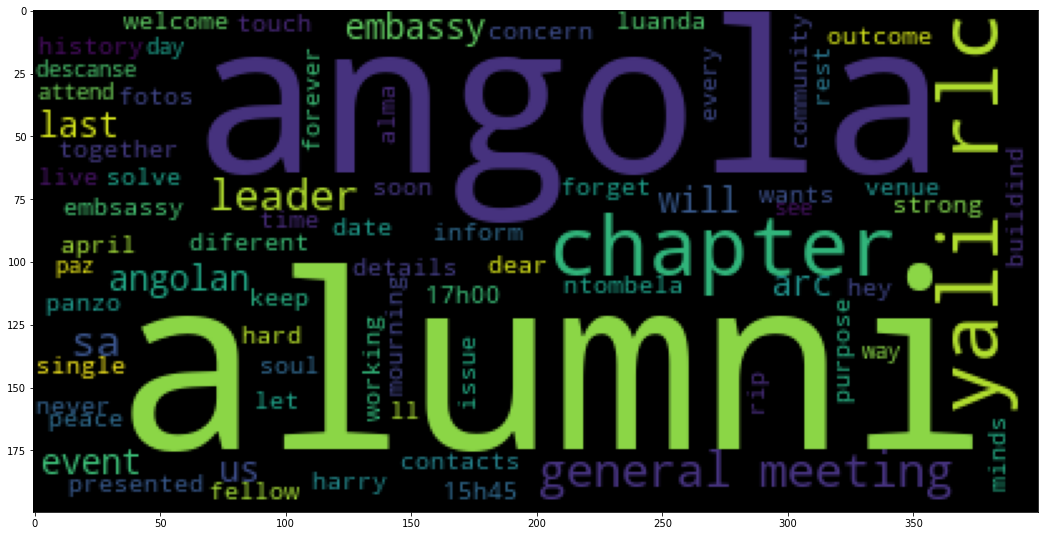

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.figure(figsize = (18,10))
plt.imshow(WordCloud().generate(textos_string));

9. RECHERCHE DE POSTS

In [ ]:
dataframe_posts.to_csv('df_posts.csv')

In [1]:
import pandas as pd

In [2]:
dataframe_posts = pd.read_csv('/content/df_posts.csv')
dataframe_posts.drop(['Unnamed: 0'], axis=1, inplace=True)
dataframe_posts

,created_time,id,permalink_url,message,likes,message_pre
0,2017-04-04T15:29:06+0000,427611934245666_427714444235415,https://www.facebook.com/427611934245666/posts...,NaN,8,NaN
1,2017-04-04T14:38:32+0000,427611934245666_427687844238075,https://www.facebook.com/427611934245666/posts...,Event Details\n\nGENERAL MEETING FOR ALL ANGOL...,6,event details \n\n general meeting all angolan...
2,2017-04-20T12:44:35+0000,427611934245666_436073646732828,https://www.facebook.com/427611934245666/posts...,NaN,4,NaN
3,2017-04-04T11:56:53+0000,427611934245666_427614064245453,https://www.facebook.com/427611934245666/posts...,NaN,4,NaN
4,2017-04-20T12:46:59+0000,427611934245666_436074750066051,https://www.facebook.com/427611934245666/posts...,Leaders!\nHere are some fotos of the last even...,2,leaders \n here are some fotos of the last eve...
5,2017-06-26T18:19:49+0000,427611934245666_1459059494137686,https://www.facebook.com/events/1459059494137686/,NaN,1,NaN
6,2017-04-12T11:27:34+0000,427611934245666_431925600480966,https://www.facebook.com/427611934245666/posts...,NaN,1,NaN
7,2017-04-04T14:45:08+0000,427611934245666_440526332963274,https://www.facebook.com/events/440526332963274/,NaN,1,NaN
8,2017-04-04T12:02:17+0000,427611934245666_427615890911937,https://www.facebook.com/427611934245666/posts...,Welcome to Yali RLC SA Angola Chapter!!!!!!\nB...,1,welcome to yali rlc sa angola chapter \n build...
9,2017-06-04T20:07:48+0000,427611934245666_456270124713180,https://www.facebook.com/427611934245666/posts...,Hey Leader!\nARC - Angola Chapter wants to let...,0,hey leader \n arc angola chapter wants to let ...


In [3]:
string = 'lançamento formação prática deep learning e tensorflow python crie passo a passo projetos utilizando modernas técnicas machine learning curso preço promocional lançamento'

In [8]:
strings_busca = ['deep', 'python']
lista_tokens = [pln(item) for item in strings_busca]
lista_tokens

[deep, python]

In [10]:
pln.vocab #C est comme une un dic ou liste qui contient tous les mots utilisés dans une langue dans ce casle pt 
#et il y en a 238 en portugais 

In [11]:
len(pln.vocab)

238

In [12]:
#Pour trouver les mots dans une string, on va utiliser le module suivant de spacy
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(pln.vocab)
matcher.add('SEARCH', None, *lista_tokens)

In [14]:
doc = pln(string)  #La string ou phrase ou chercher les mots
matches = matcher(doc) #Dans matcher, on a les mots qu on cherche contenu dans lista_tokens
matches  #Retourne ID de la recherche et les positions qu occupe ces mots dans la phrase source

[(8661325627334373315, 3, 4), (8661325627334373315, 7, 8)]

In [15]:
doc[3:4], doc[7:8]

(deep, python)

In [ ]:
doc[3-2:4+2], doc[7-2:8+2]

(formação prática deep learning e, e tensorflow python crie passo)

In [17]:
strings_busca = ['deep learning', 'python']
lista_tokens = [pln(item) for item in strings_busca]
lista_tokens

[deep learning, python]

In [18]:
search_strings_html = ' '.join([str(element) for element in strings_busca])
search_strings_html

'deep learning python'

In [19]:
#On va appliquer ou faire cette search sur notre dataset 
strings_busca = ['deep learning', 'python']
lista_tokens = [pln(item) for item in strings_busca]
matcher = PhraseMatcher(pln.vocab)
matcher.add('SEARCH', None, *lista_tokens)
numero_palavras = 10

In [ ]:
search_strings_html = ' '.join([str(element) for element in strings_busca])
search_strings_html

'deep learning python'

In [20]:
from IPython.core.display import HTML

In [21]:
import warnings
warnings.simplefilter('ignore')

In [24]:
dataframe_posts.isnull().sum()

created_time     0
id               0
permalink_url    0
message          6
likes            0
message_pre      6
dtype: int64

In [27]:
#Je vais juste remplacer tous les NaN pour un msg par defaut pour eviter les desagrements lors des etapes suivantes:
dataframe_posts = dataframe_posts.fillna('Pas de message pour ce post')

In [28]:
for index, row in dataframe_posts.iterrows(): #iterrows retourne notre dataset ligne par ligne 
  print(index, row)

0 created_time                              2017-04-04T15:29:06+0000
id                                 427611934245666_427714444235415
permalink_url    https://www.facebook.com/427611934245666/posts...
message                                Pas de message pour ce post
likes                                                            8
message_pre                            Pas de message pour ce post
Name: 0, dtype: object
1 created_time                              2017-04-04T14:38:32+0000
id                                 427611934245666_427687844238075
permalink_url    https://www.facebook.com/427611934245666/posts...
message          Event Details\n\nGENERAL MEETING FOR ALL ANGOL...
likes                                                            6
message_pre      event details \n\n general meeting all angolan...
Name: 1, dtype: object
2 created_time                              2017-04-20T12:44:35+0000
id                                 427611934245666_436073646732828
permalink_

In [30]:
for index, row in dataframe_posts.iterrows():
  #print(index, row)
  marked_text = ''
  doc = pln(row['message_pre'])
  id = row['id']
  matches = matcher(doc)
  if matches == []:
    continue
  
  display(HTML(f'<h2>{search_strings_html.upper()}</h2>'))
  display(HTML(f""" 
                <p>
                  <strong>ID:</strong>{id}</br>
                  <strong>Palavras encontradas</strong> {len(matches)}
                </p>
              """))
  for i in matches:
    #print(i)  
    start = i[1] - numero_palavras
    if start < 0:
      start = 0
    for j in range(len(lista_tokens)):
      if doc[i[1]:i[2]].similarity(lista_tokens[j]) == 1.0:
        search_text = str(lista_tokens[j])
        marked_text += str(doc[start:i[2] + numero_palavras]).replace(search_text, f"<mark>{search_text}</mark>")
        marked_text += "<br /><br />"
  display(HTML(f"""<blockquote>... {marked_text} ..."""))

10. GROUPER LES POSTES PAR DATE

In [31]:
dataframe_posts.head(1)

,created_time,id,permalink_url,message,likes,message_pre
0,2017-04-04T15:29:06+0000,427611934245666_427714444235415,https://www.facebook.com/427611934245666/posts...,Pas de message pour ce post,8,Pas de message pour ce post


In [32]:
#On va convertir la colonne created_time en data
dataframe_posts['created_time'] = pd.to_datetime(dataframe_posts['created_time'])
dataframe_posts.head(1)

,created_time,id,permalink_url,message,likes,message_pre
0,2017-04-04 15:29:06+00:00,427611934245666_427714444235415,https://www.facebook.com/427611934245666/posts...,Pas de message pour ce post,8,Pas de message pour ce post


In [33]:
#Grouper par Mois
posts_data = dataframe_posts.groupby(dataframe_posts['created_time'].dt.month).count()
posts_data

,created_time,id,permalink_url,message,likes,message_pre
created_time,,,,,,
4,9,9,9,9,9,9
6,3,3,3,3,3,3


In [35]:
import plotly.express as px

In [36]:
grafico = px.bar(posts_data, x = posts_data.index, y = 'message', title = 'Posts por meses')
grafico.show()

In [ ]:
#De la même facon on a fait par mois (to.Month), on peut faire cet agraoupement par jour (t.Day), par annee (to.Year)

12. EXTRACTION DES COMMENTAIRES DE POSTES

In [ ]:
lista_comentarios = []
for index, post in dataframe_posts.iterrows():
  #print(index, post)
  comentarios = graph_id2.get_connections(id=post['id'], connection_name='comments', include_hidden = True)
  #print(comentarios)
  if comentarios['data']:
    #print(comentarios)
    lista_comentarios.append(comentarios['data'][0]['message'])

In [ ]:
len(lista_comentarios) #pour compter le nbre de commentaires

In [ ]:
#On cree un dataframe pour armazenar les commentaires
comentarios_df = pd.DataFrame(lista_comentarios, columns = ['texto'])
comentarios_df

12. PRE TRAITEMENT DES COMMENTAIRES

In [ ]:
comentarios_df['texto_pre'] = comentarios_df['texto'].apply(pre_processamento)
comentarios_df.head()

In [ ]:
#Notre fonction pre_processamento n a pas été developpé aveç la lemmatization, et comme on est en train de preparer cette nouvelle dataset pour faire 
#l analyse de sentiment y appliquer un algo, donc on crée une nouvelle fonction pre_processamento qui va faire la lemmatization de notre base 

In [ ]:
def pre_processamento2(texto):
  documento = pln(texto)

  lista = []
  for token in documento:
    lista.append(token.lemma_)
  lista = ' '.join([str(elemento) for elemento in lista])
  return lista

In [ ]:
pre_processamento2('cuidar cuidado cuidando')

In [ ]:
comentarios_df['texto_pre2'] = comentarios_df['texto_pre'].apply(pre_processamento2)
comentarios_df.head()

12. ANALYSE DE SENTIMENTS

In [ ]:
#Nous allons utiliser notre modele developpé en spcay dans la rubrique Analyse de sentiment 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
classificador = spacy.load('/content/drive/MyDrive/Cursos - recursos/Mineração e Análise de Dados do Facebook/modelo')
classificador

In [ ]:
comentarios_df['texto_pre2'][1]

'ótima idéia terabyte memória idear quanto livro armazenar ter armazenar milhar livro e o ir programar ensinar o escrever livro o conhecimento curso universitário existir mundo poder armazenar livro e i.a programar ensinar o constar livro humano e aperfeiçoar d poder professor conhecimento curso universitário mundo ser i.as futurar poder idéia bíblia baixar celular e vários tradução acrescentar baixar kb'

In [ ]:
previsao = classificador(comentarios_df['texto_pre2'][1])
previsao.cats

{'NEGATIVO': 0.03066367469727993, 'POSITIVO': 0.9857757687568665}

In [ ]:
comentarios_df['Sentimento'] = None
for i in range(0, len(comentarios_df)):
  sentimento = classificador(comentarios_df['texto_pre2'][i])
  if sentimento.cats['POSITIVO'] > sentimento.cats['NEGATIVO']:
    comentarios_df['Sentimento'][i] = 'Positivo'
  else:
    comentarios_df['Sentimento'][i] = 'Negativo'

In [ ]:
comentarios_df

,texto,texto_pre,texto_pre2,Sentimento
0,"Poderia criar um curso sobre álgebra linear e estatística, voltado pro ramo de inteligência arti...",poderia criar curso álgebra linear e estatística voltado pro ramo inteligência artificial,poder criar cursar álgebra linear e estatístico voltar pro ramo inteligência artificial,Positivo
1,Uma ótima idéia com 1 terabyte de memória da para ter nem faço ideia de quantos livros armazenad...,ótima idéia terabyte memória ideia quantos livros armazenados tinham armazenar milhares livros e...,ótima idéia terabyte memória idear quanto livro armazenar ter armazenar milhar livro e o ir prog...,Positivo
2,Carai....daqui uns dias eu vou pedir emprego na IA Experts....hahahahah,carai .... daqui dias vou pedir emprego ia experts .... hahahahah,carai .... d aqui dia ir pedir empregar ir expert .... hahahahah,Positivo
3,Bom dia Jones. Seria interessante incluir no curso como usar o pytorch xla e como configurar no ...,dia jones interessante incluir curso o pytorch xla e configurar collab precisei e dor cabeça hehe,dia jones interessante incluir cursar o pytorch xla e configurar collab precisar e dor cabeça hehe,Positivo
4,Mariana Kleina,mariana kleina,mariano kleina,Positivo
5,👏👏🎖️,👏 👏 🎖 ️,👏 👏 🎖 ️,Positivo
6,Sidivaldo Oliveira,sidivaldo oliveira,sidivaldo oliveira,Positivo
7,Um fator importante hj em dia tem sido a disponibilidade de bolsas.. o cenário mudou bastante de...,fator importante hj dia sido a disponibilidade bolsas .. o cenário mudou o ano .. o ms academico...,fator importante hj dia ser o disponibilidade bolsar .. o cenário mudar o ano .. o ms academico ...,Positivo
8,Tentei me inscrever no site pra fazer o curso: inseri nome e e-mail e recebi e-mail de confirmaç...,inscrever site pra o curso inseri nome e e-mail e recebi e-mail confirmação direciona página reg...,inscrever site pra o cursar inserir nome e e-mail e receber e-mail confirmação direciona página ...,Positivo
9,eu sonhei com isso nessa madrugada,sonhei n madrugada,sonhar n madrugar,Negativo


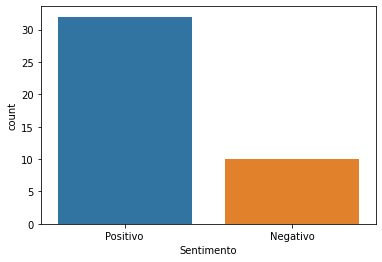

In [ ]:
import seaborn as sns
sns.countplot(comentarios_df['Sentimento']);